# Visualizing ASAP targets

In [1]:
from asapdiscovery.dataviz.html_viz import HTMLVisualizer
from asapdiscovery.data.testing.test_resources import fetch_test_file
from asapdiscovery.simulation.simulate import SimulationResult
from asapdiscovery.docking.openeye import POSITDockingResults
from IPython.display import display, HTML
from asapdiscovery.docking.docking import DockingInputPair
from asapdiscovery.docking.openeye import POSITDocker


In [2]:
from asapdiscovery.data.backend.openeye import oechem
from asapdiscovery.data.schema.complex import Complex, PreppedComplex
from asapdiscovery.data.schema.ligand import Ligand

In [3]:
protein = fetch_test_file("Mpro-P2660_0A_bound-prepped_complex.pdb")

In [4]:
html_vizualizer = HTMLVisualizer(
        target="SARS-CoV-2-Mpro",
        color_method="subpockets",
        align=True,
        write_to_disk=False,
    )
vizs = html_vizualizer.visualize(inputs=[protein], use_dask=True)

2024-05-01 22:15:08,009 [INFO] [plipcmd.py:124] plip.plipcmd: Protein-Ligand Interaction Profiler (PLIP) 2.3.0
2024-05-01 22:15:08,009 [INFO] [plipcmd.py:125] plip.plipcmd: brought to you by: PharmAI GmbH (2020-2021) - www.pharm.ai - hello@pharm.ai
2024-05-01 22:15:08,009 [INFO] [plipcmd.py:126] plip.plipcmd: please cite: Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA. Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
2024-05-01 22:15:08,009 [INFO] [plipcmd.py:49] plip.plipcmd: starting analysis of tmp_complex.pdb
2024-05-01 22:15:08,145 [INFO] [plipcmd.py:165] plip.plipcmd: finished analysis, find the result files in /tmp/tmp8huk3x6x/


In [5]:
html = vizs[0][0] 

In [6]:
display(HTML(html))

In [7]:
html_vizualizer_fitness = HTMLVisualizer(
        target="SARS-CoV-2-Mpro",
        color_method="fitness",
        align=True,
        write_to_disk=False,
    )
fitness_vizs = html_vizualizer_fitness.visualize(inputs=[protein], use_dask=False)

/store/projects/ASAP_dev/asapdiscovery/asapdiscovery-dataviz/asapdiscovery/dataviz/html_viz.py:815: UserWarning: Warning: no unfit residues found for residue 108 in chain A.
  warnings.warn(
2024-05-01 22:15:21,808 [INFO] [plipcmd.py:124] plip.plipcmd: Protein-Ligand Interaction Profiler (PLIP) 2.3.0
2024-05-01 22:15:21,808 [INFO] [plipcmd.py:125] plip.plipcmd: brought to you by: PharmAI GmbH (2020-2021) - www.pharm.ai - hello@pharm.ai
2024-05-01 22:15:21,808 [INFO] [plipcmd.py:126] plip.plipcmd: please cite: Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA. Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
2024-05-01 22:15:21,808 [INFO] [plipcmd.py:49] plip.plipcmd: starting analysis of tmp_complex.pdb
2024-05-01 22:15:21,944 [INFO] [plipcmd.py:165] plip.plipcmd: finished analysis, find the result files in /tmp/tmprsclpoka/



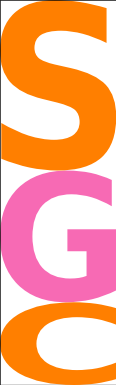
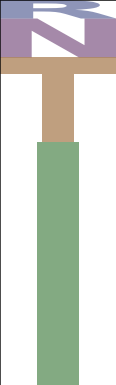
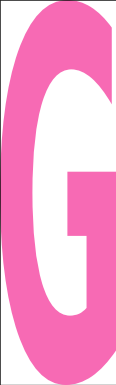
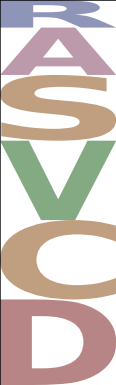
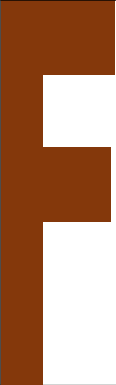
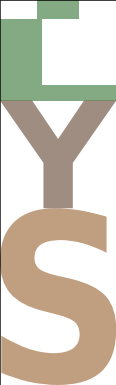
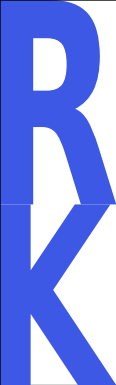
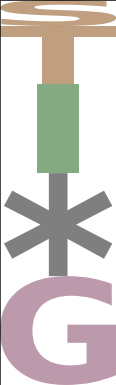
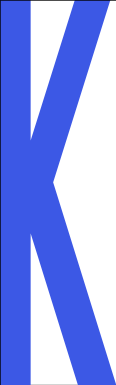
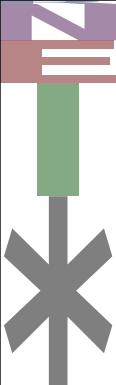
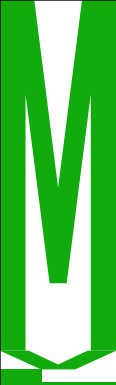
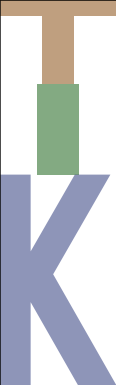
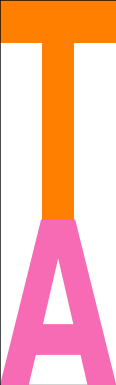
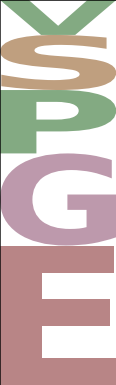
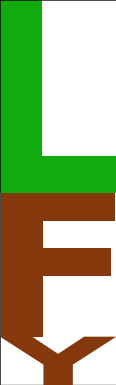
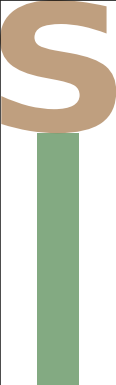
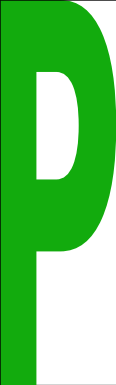
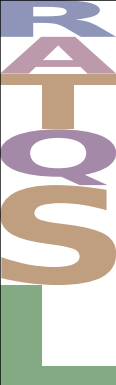
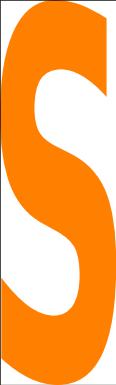
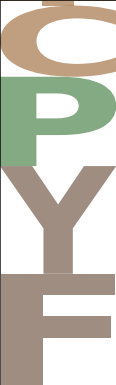
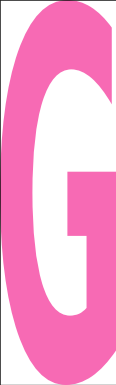
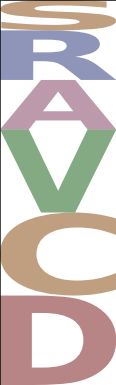
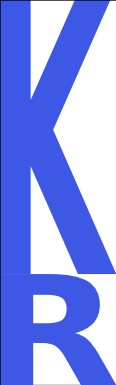
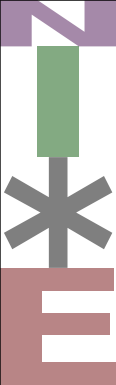
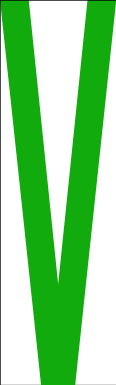
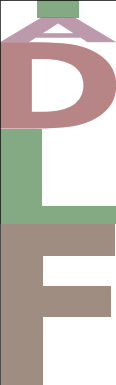
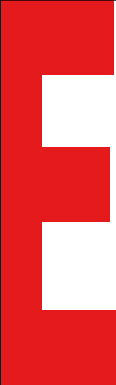
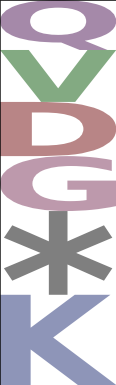
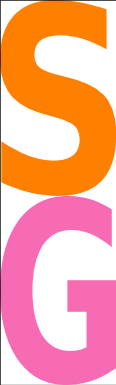
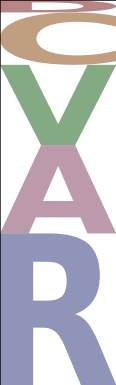
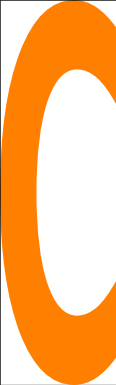
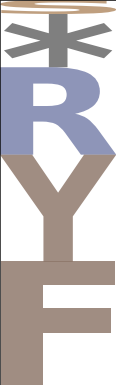
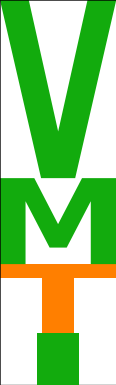
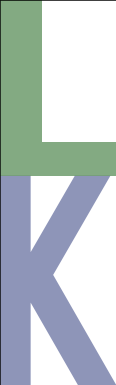
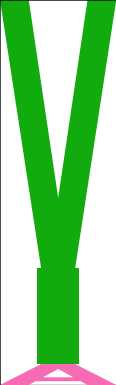
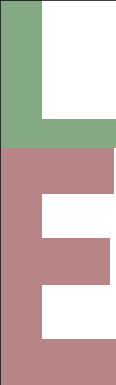
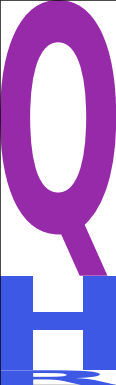
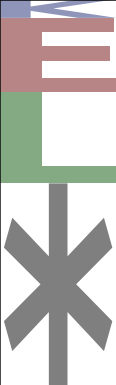
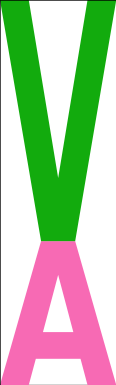
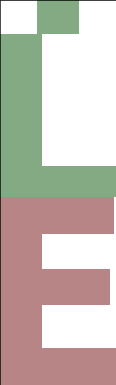
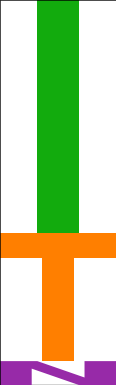
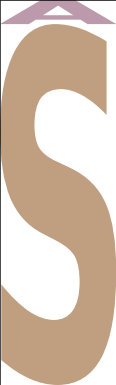
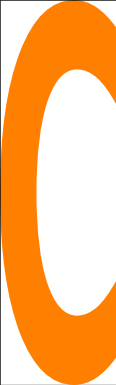
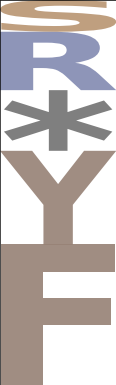
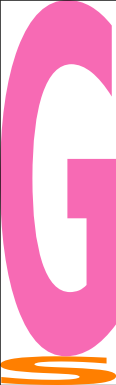
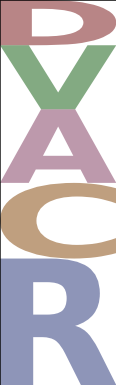
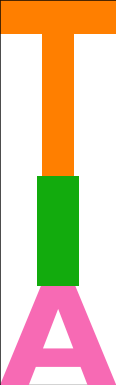
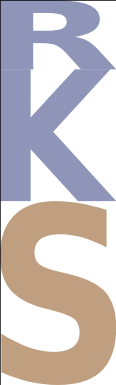
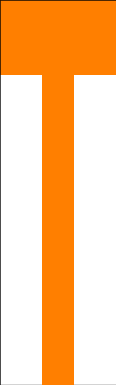
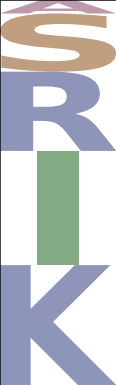
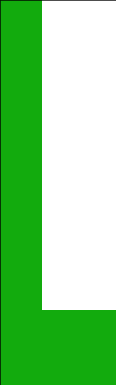
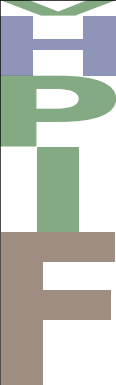
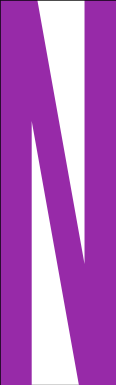
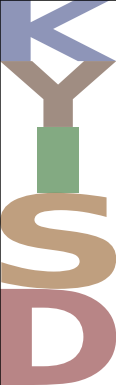
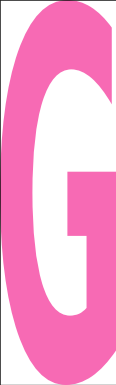
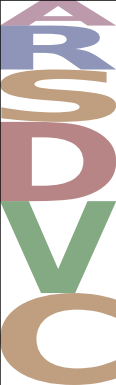
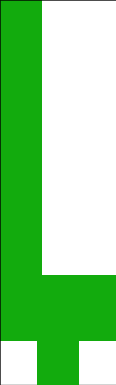
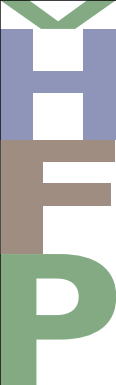
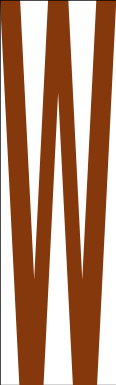
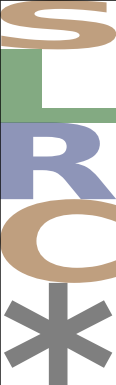
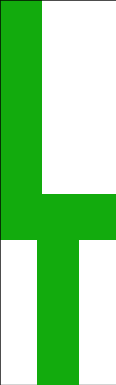
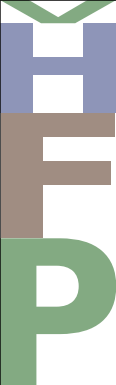
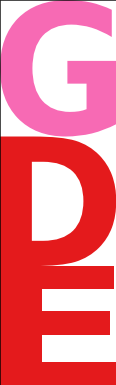
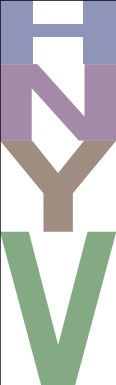
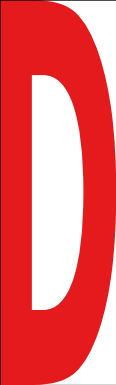
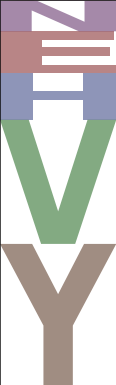
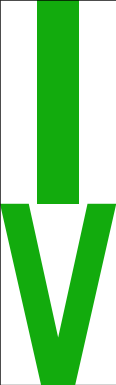
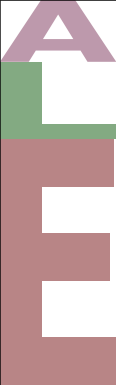
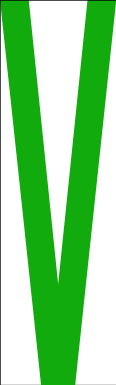
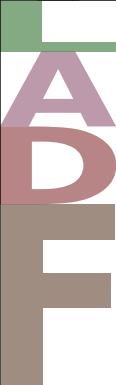
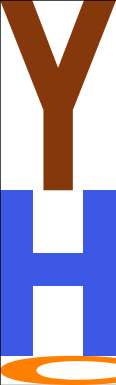
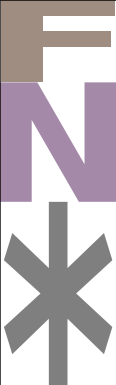
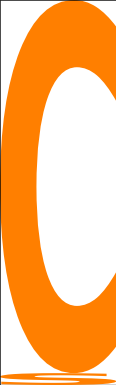
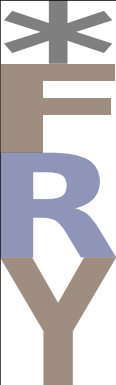
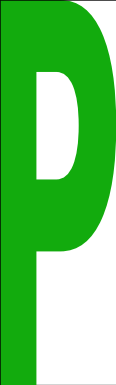
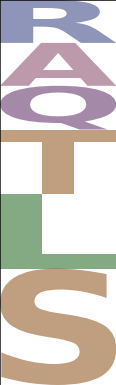
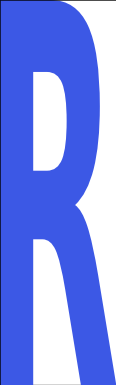
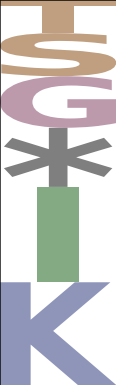
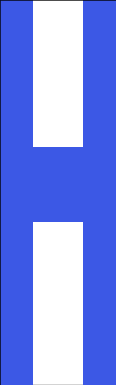
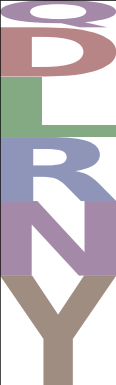
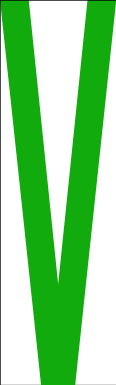
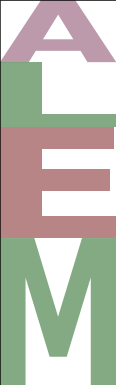
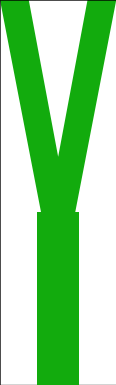
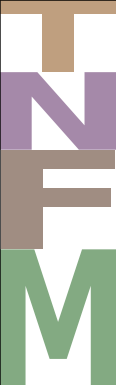
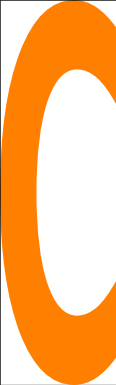
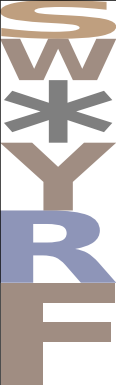
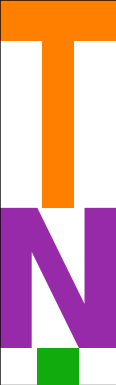
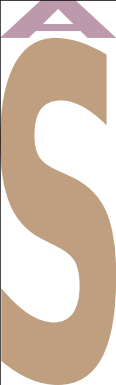
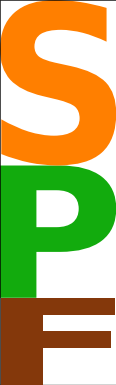
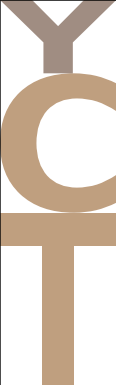
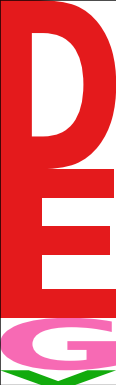
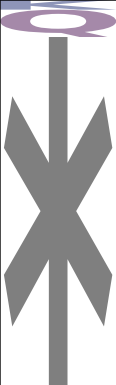
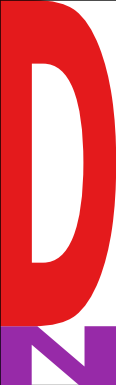
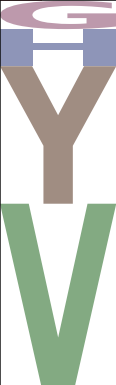
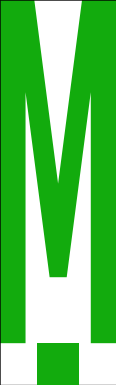
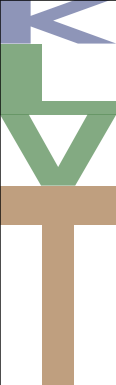
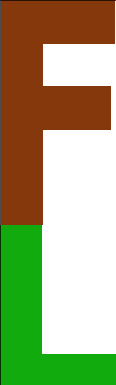
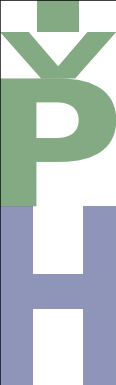
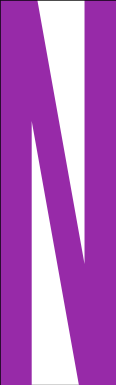
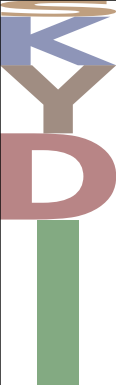
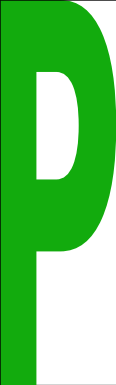
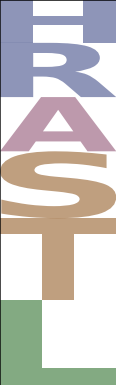
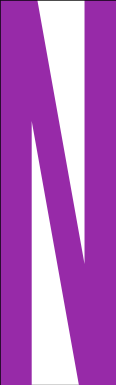
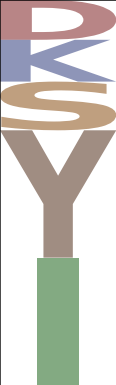
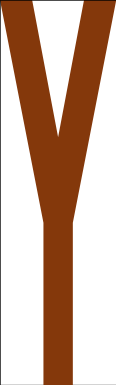
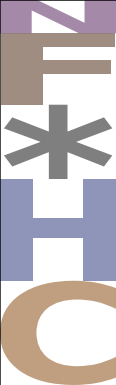
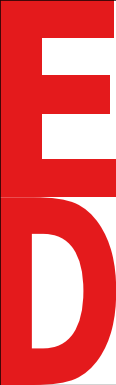
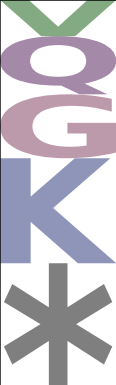
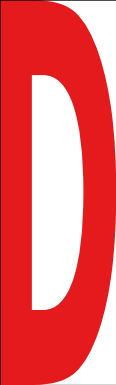
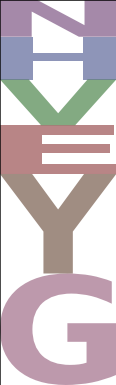
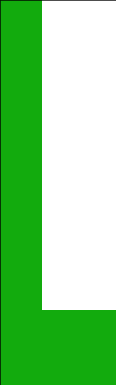
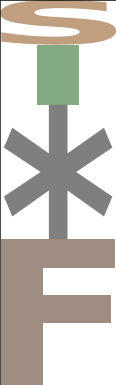
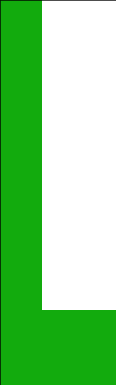
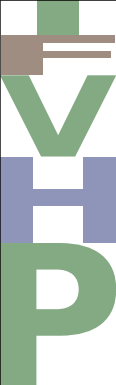
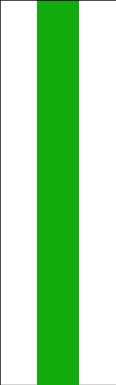
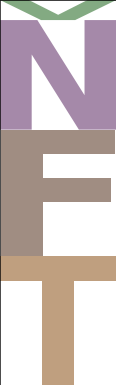
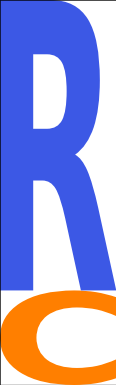
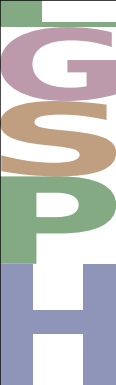
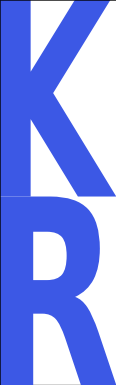
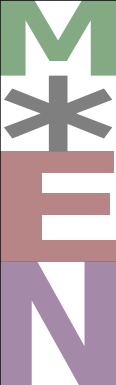
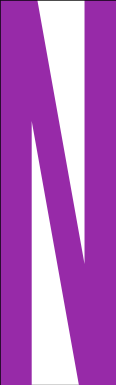
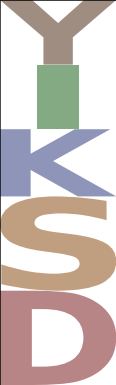
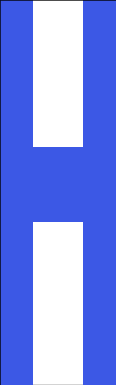
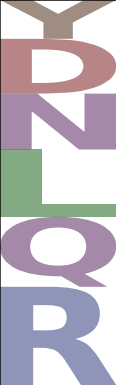
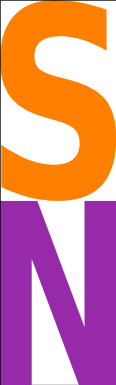
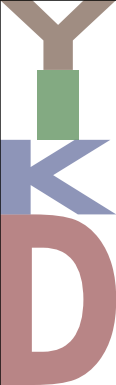
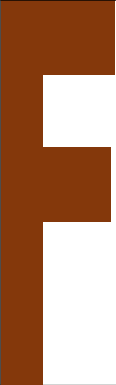
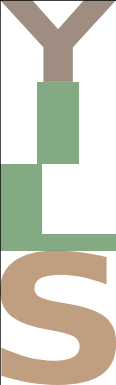
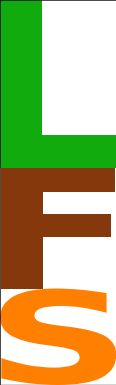
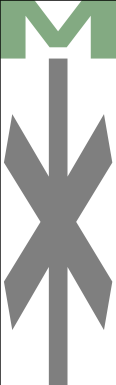
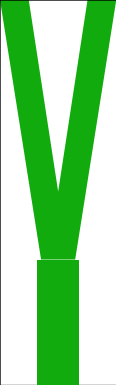
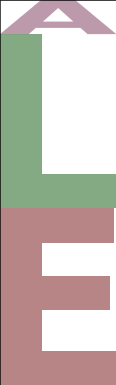
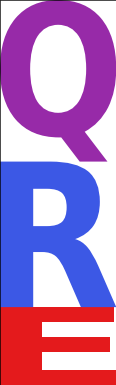
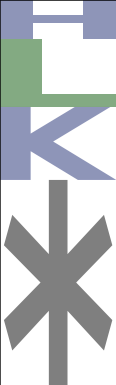
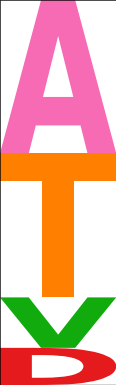
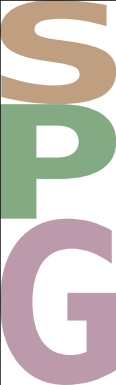
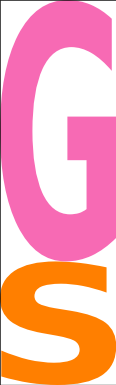
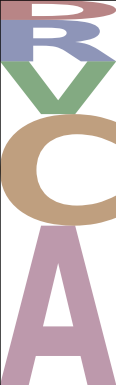
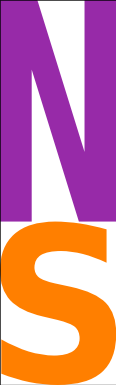
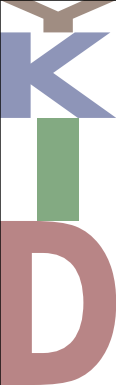
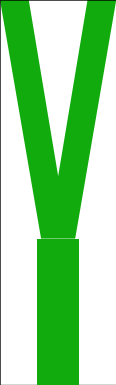
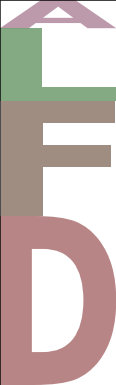
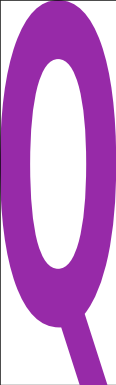
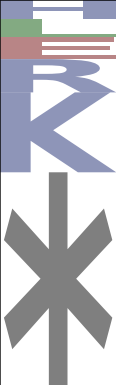
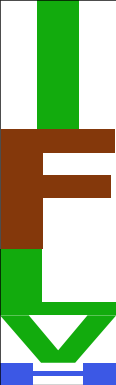
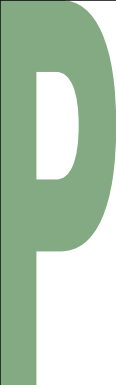
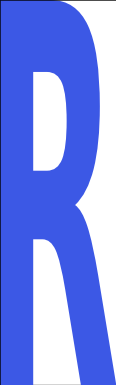
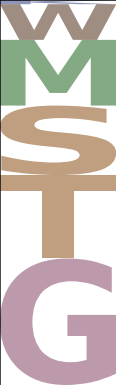
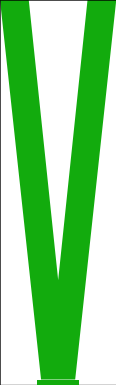
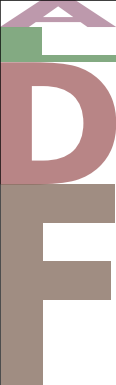
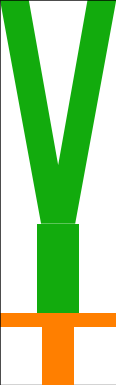
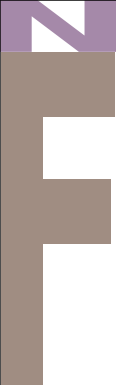
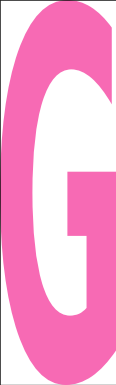
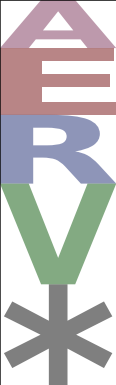
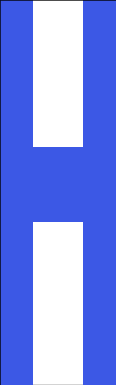
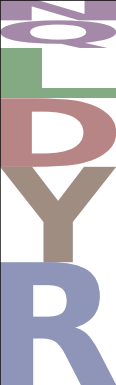
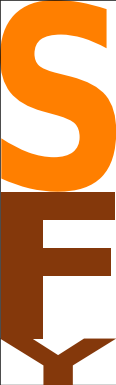
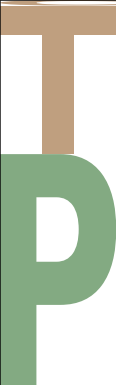
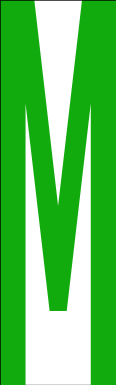
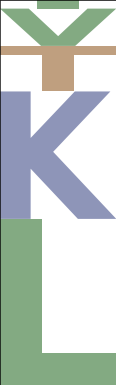
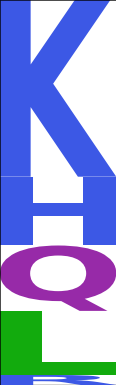
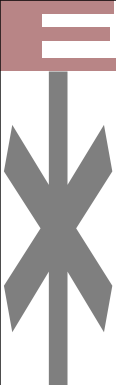
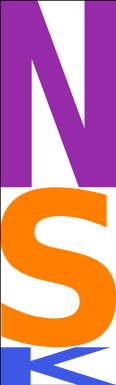
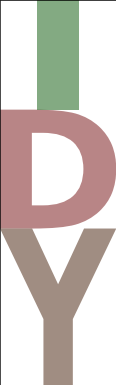
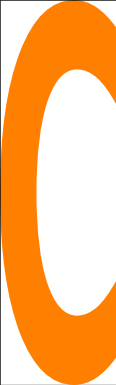
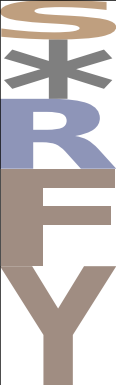
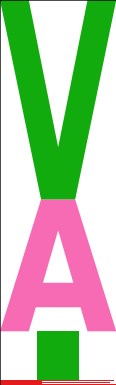
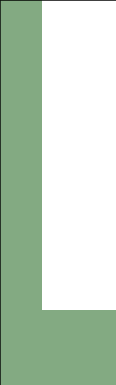
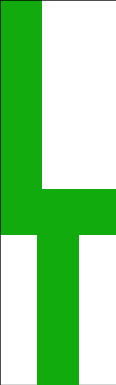
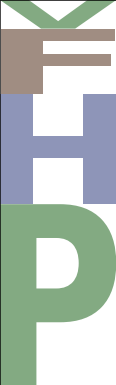
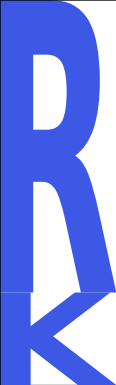
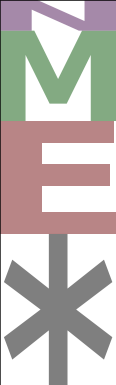
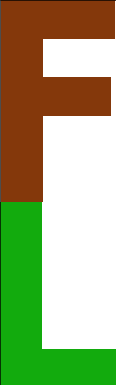
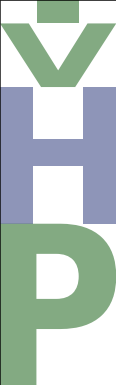
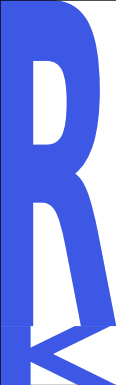
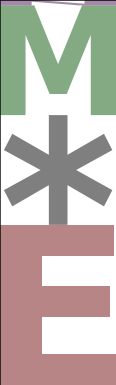
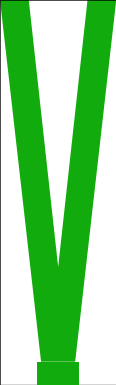
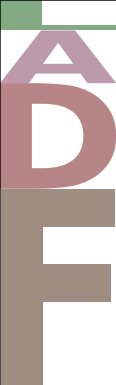
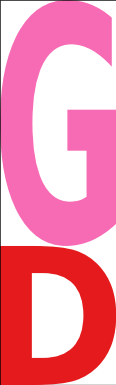
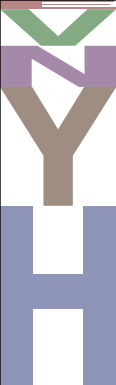
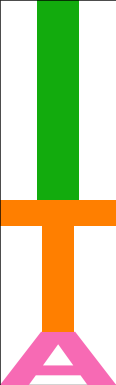
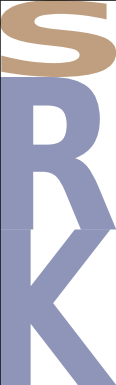
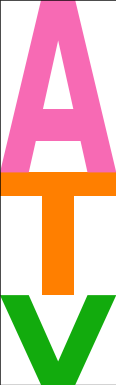
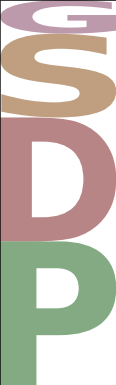
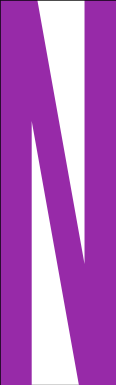
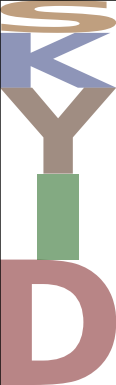
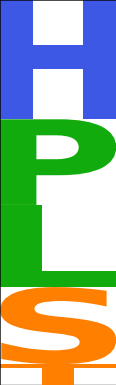
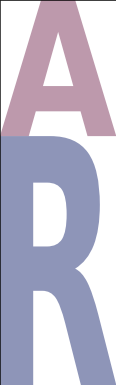
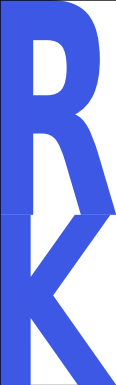
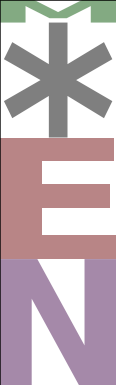
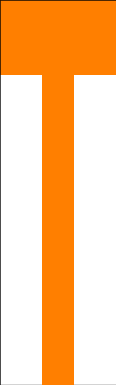
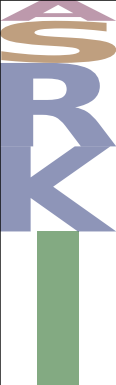
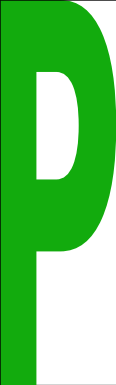
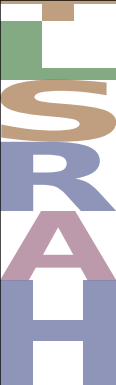
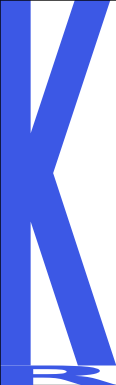
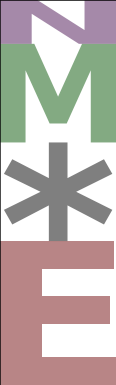
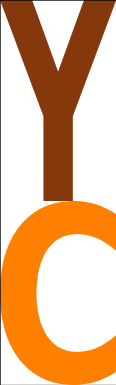
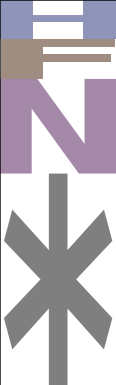
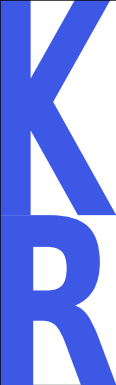
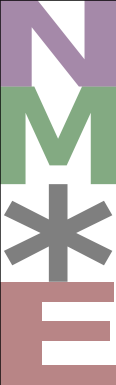
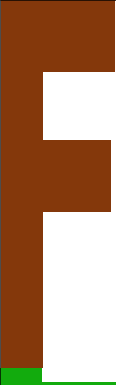
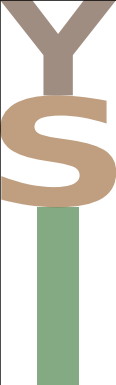
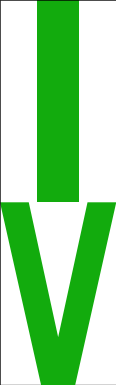
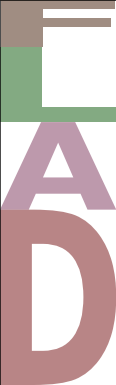
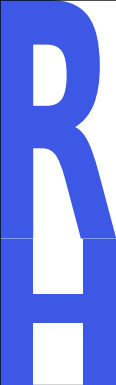
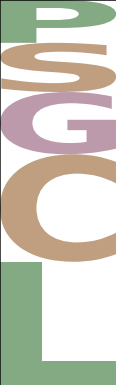
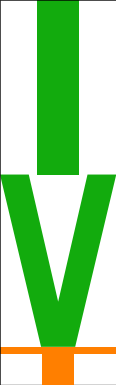
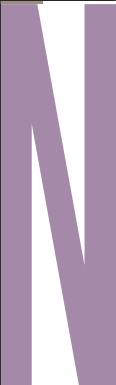
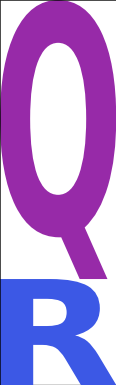
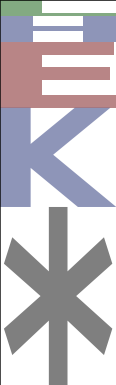
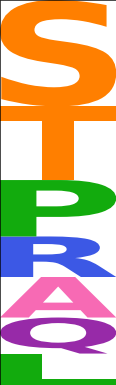
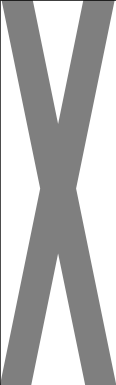
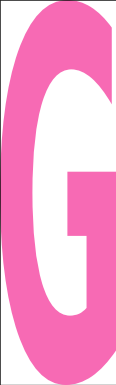
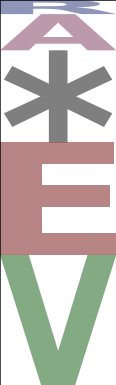
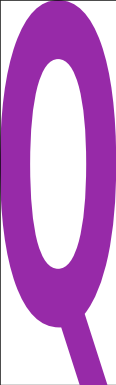
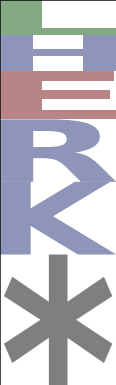
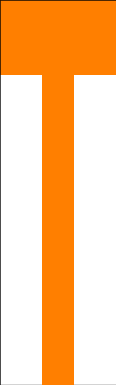
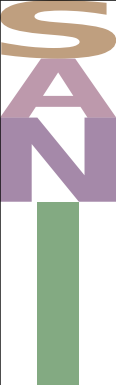
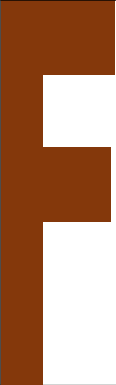
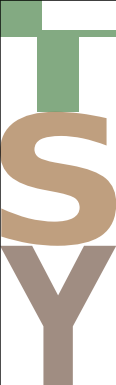
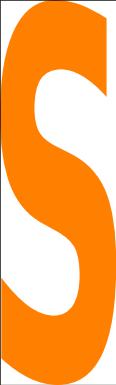
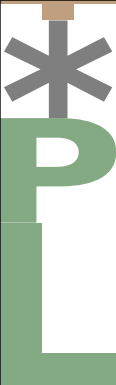
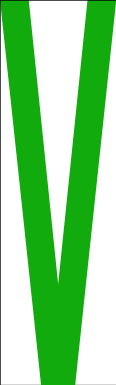
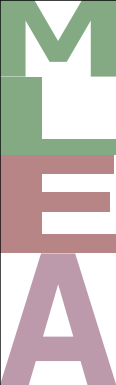
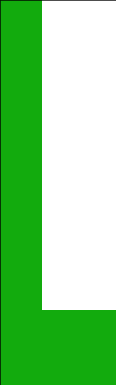
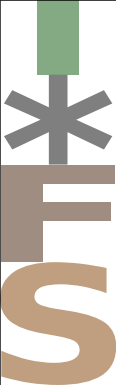
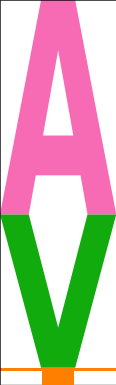
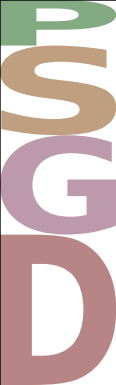
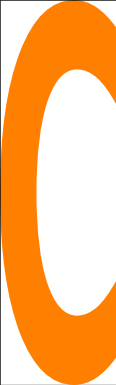
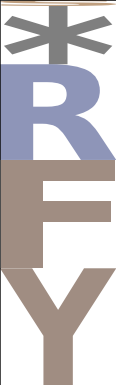
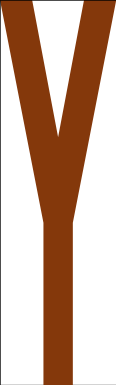
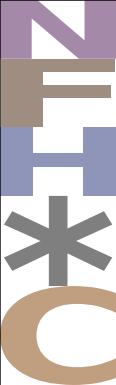
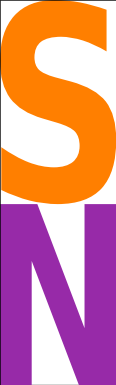
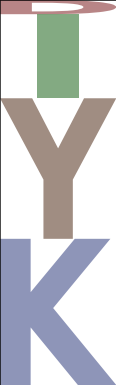
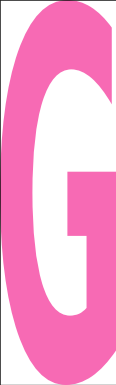
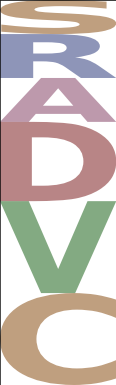
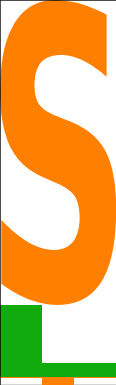
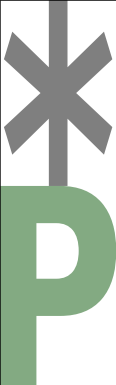
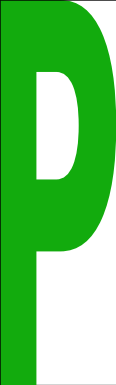
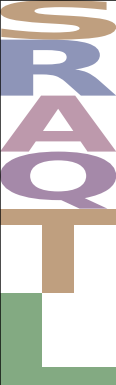
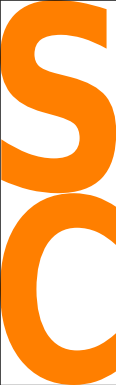
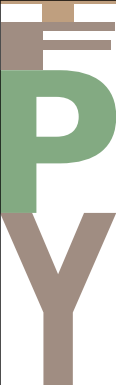
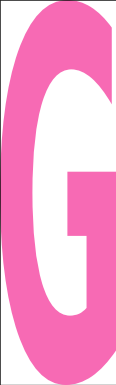
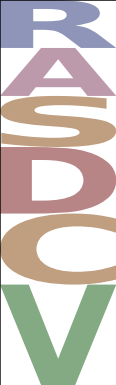
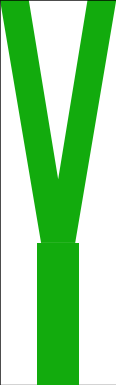
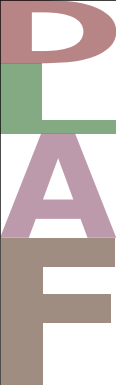
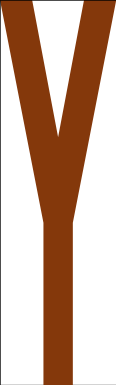
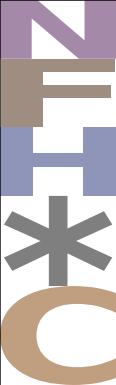
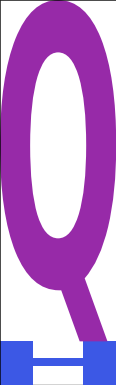
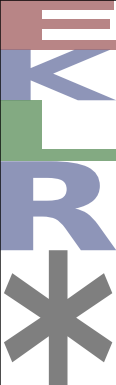
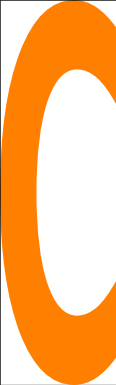
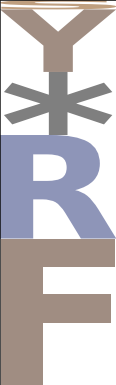
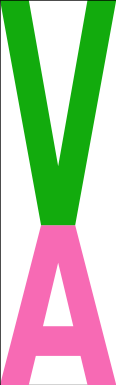
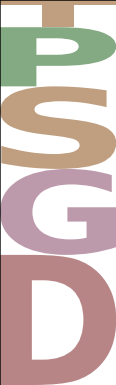
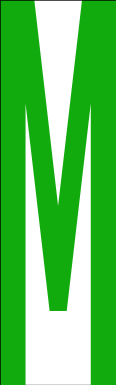
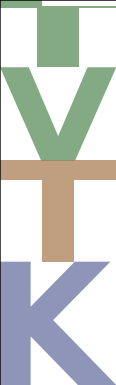
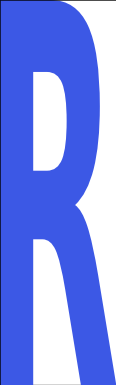
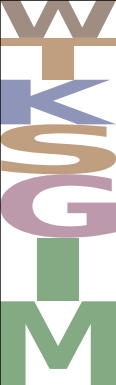
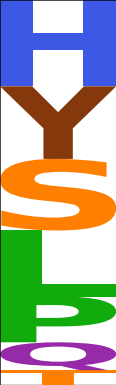
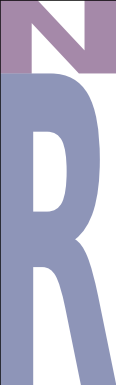
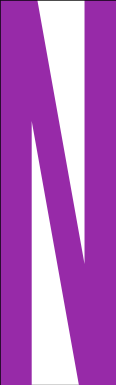
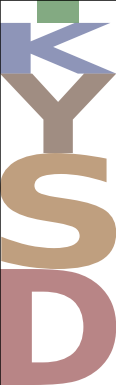
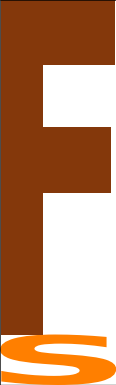
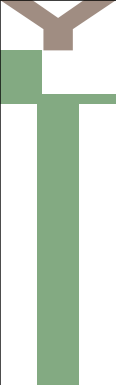
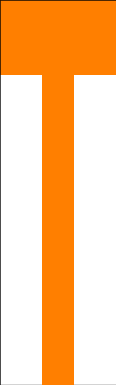
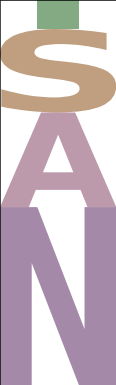
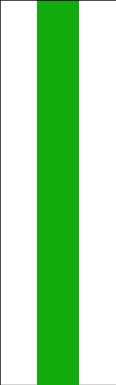
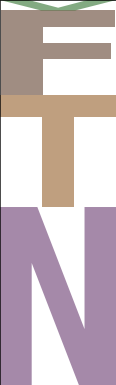
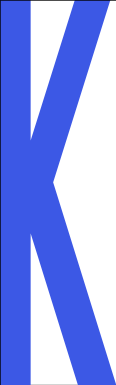
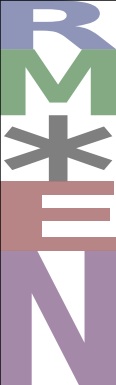
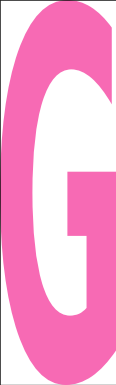
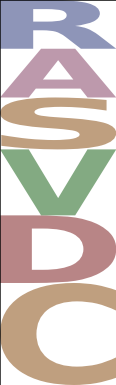
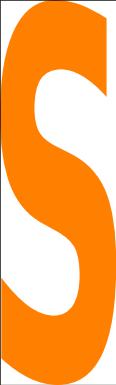
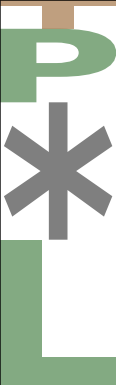
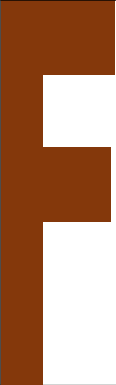
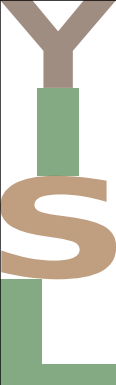
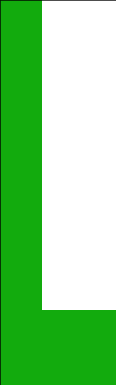
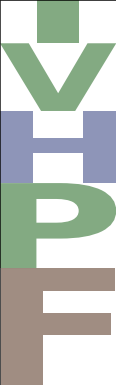
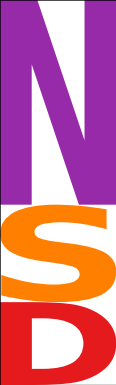
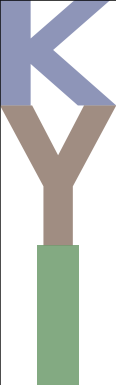
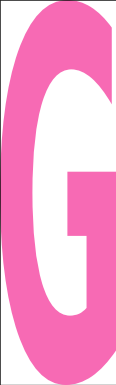
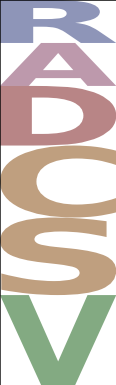
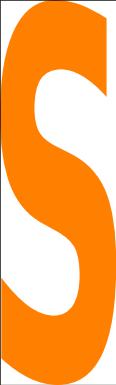
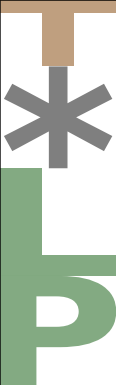
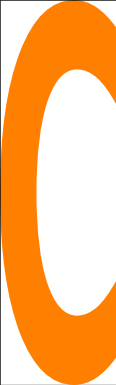
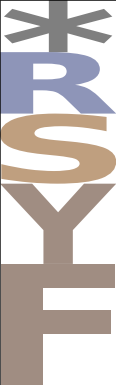
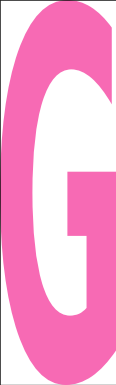
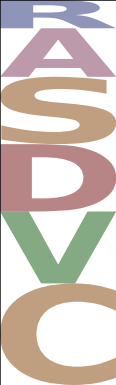
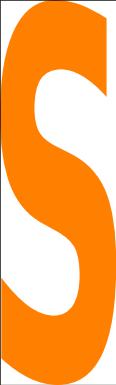
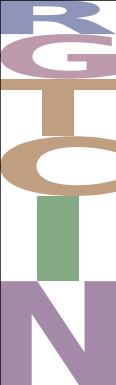
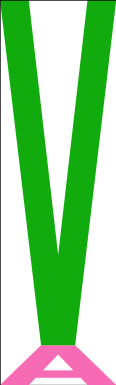
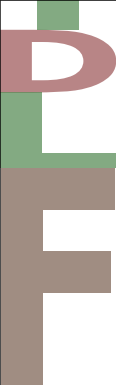
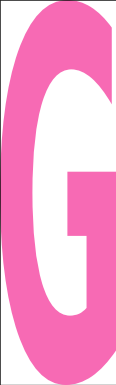
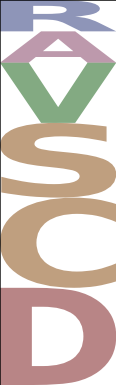
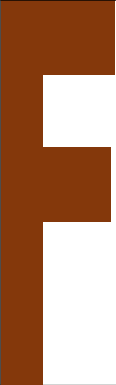
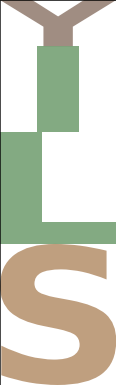
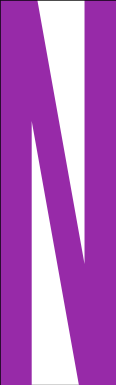
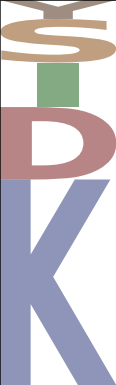
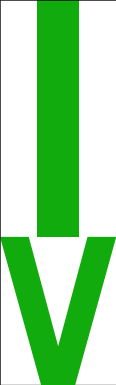
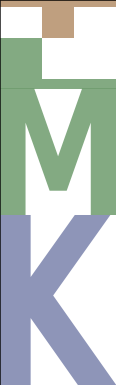
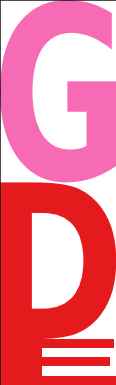
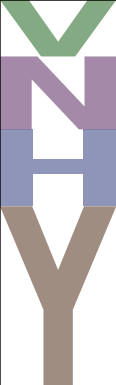
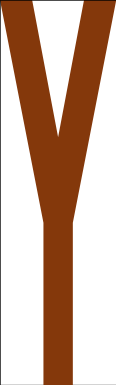
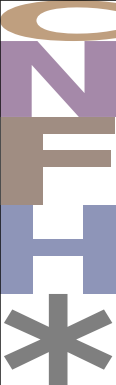
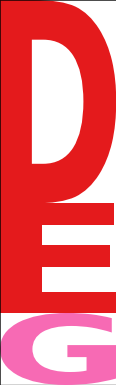
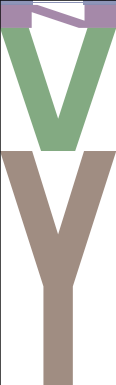
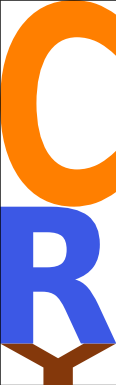
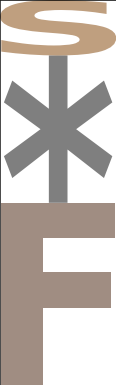
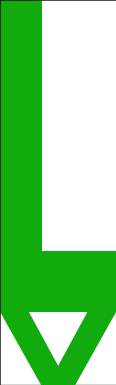
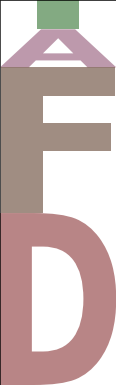
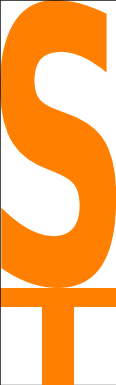
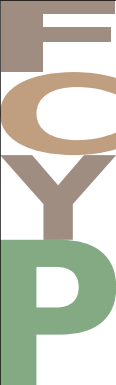
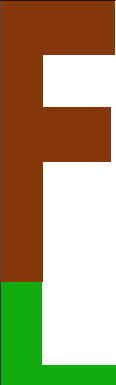
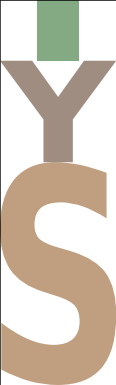
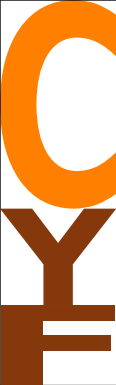
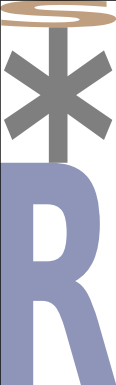
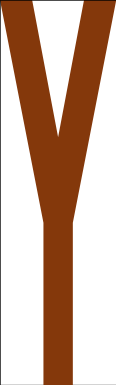
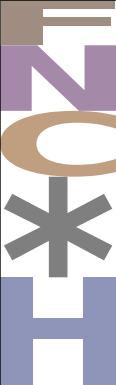
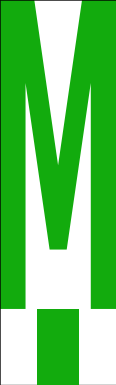
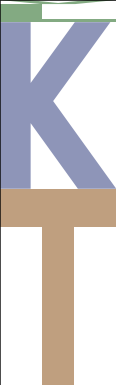
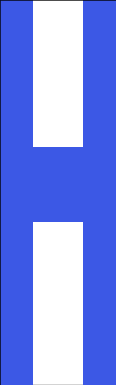
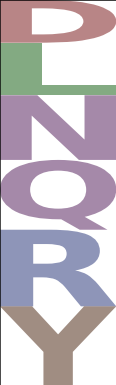
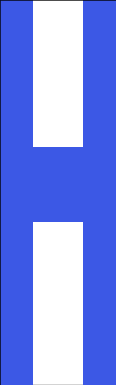
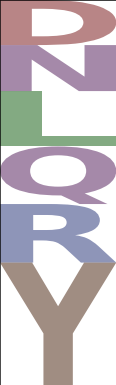
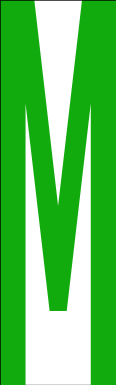
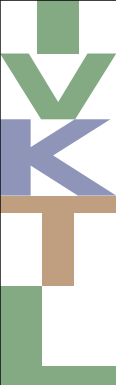
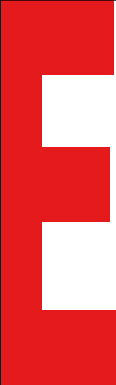
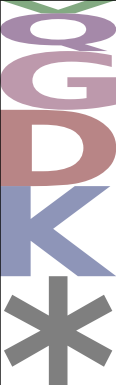
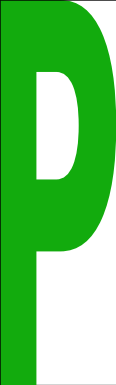
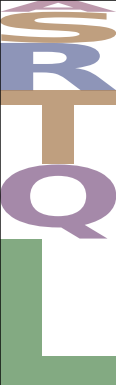
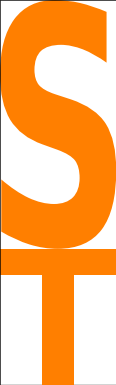
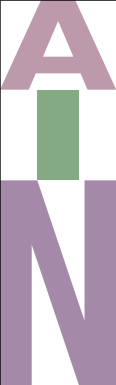
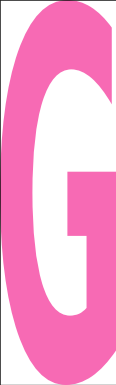
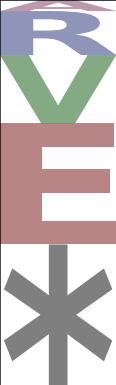
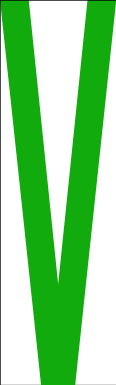
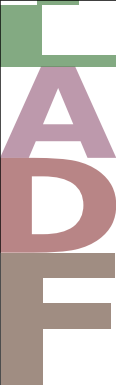
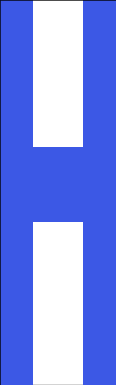
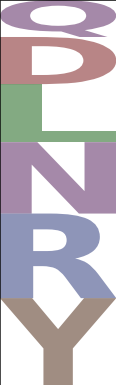
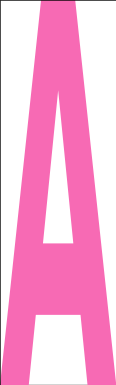
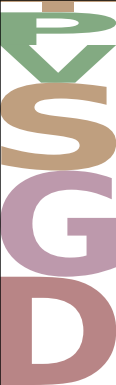
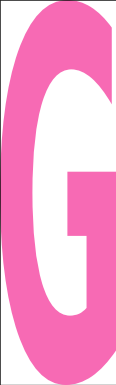
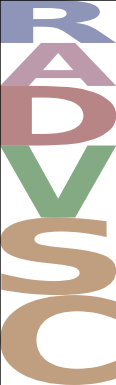
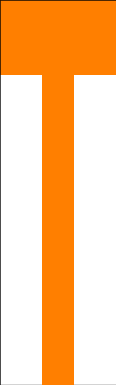
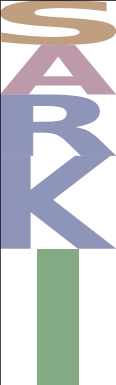
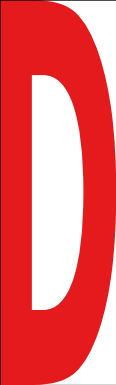
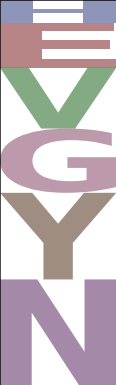
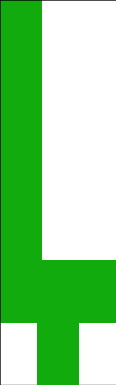
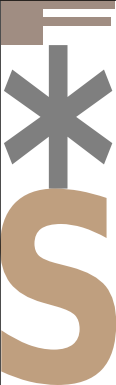
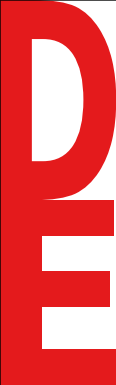
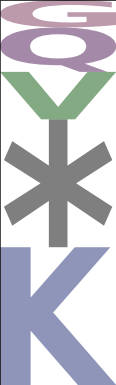
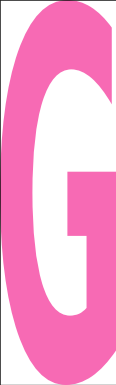
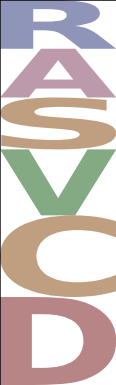
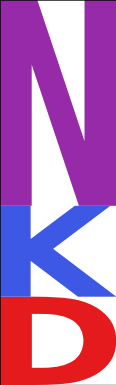
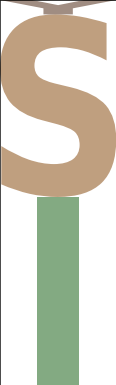
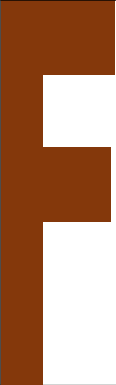
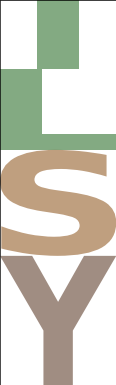
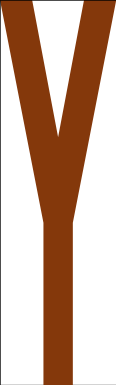
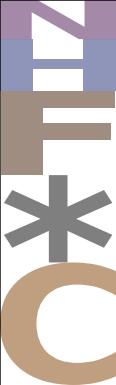
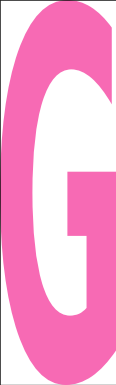
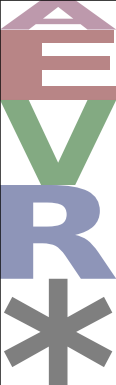
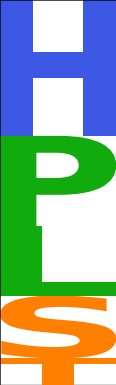
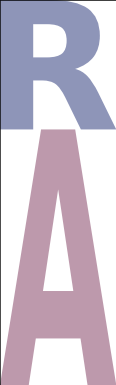
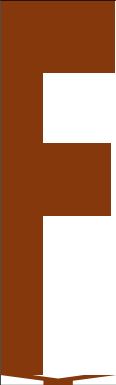
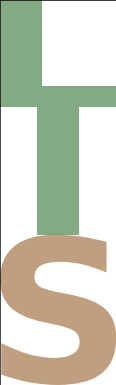
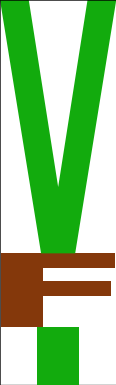
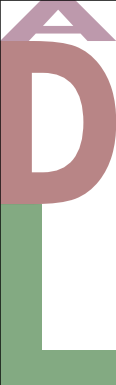
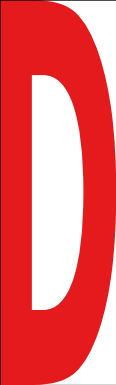
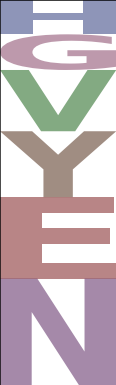
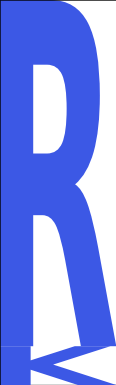
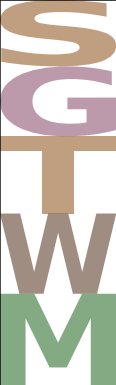
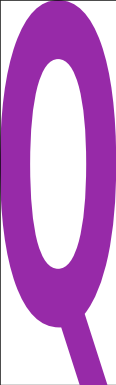
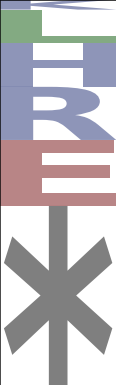
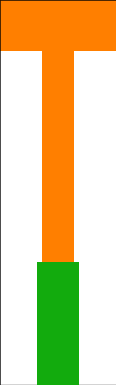
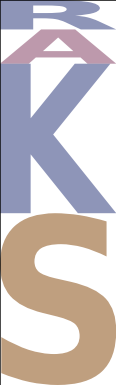
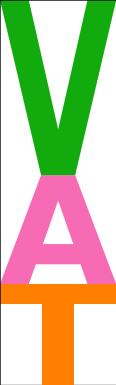
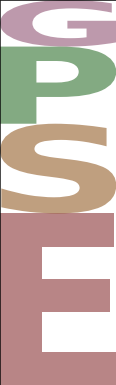
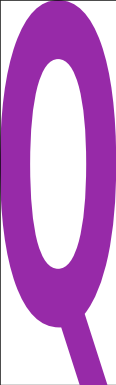
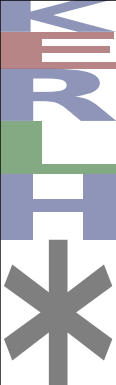
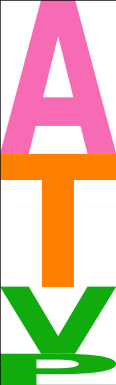
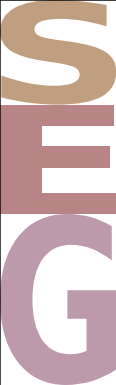
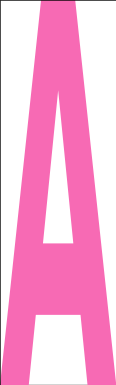
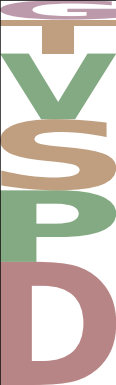
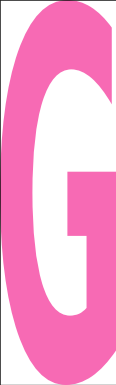
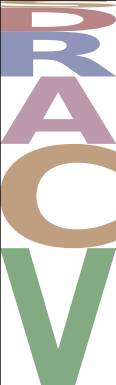
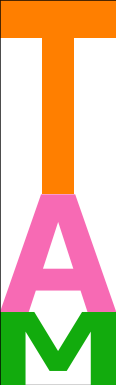
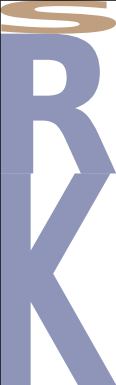
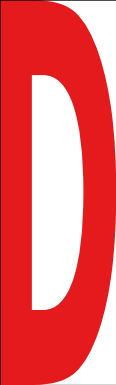
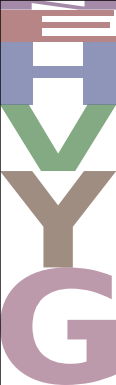
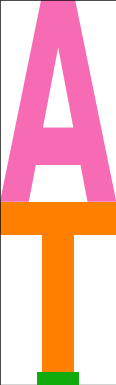
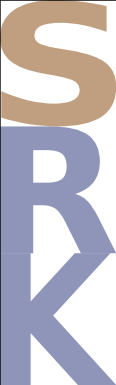
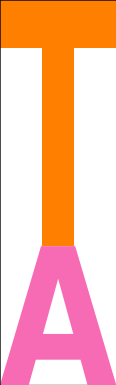
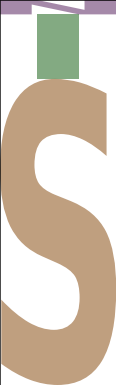
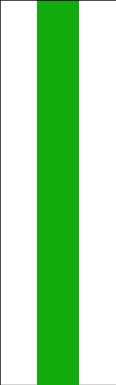
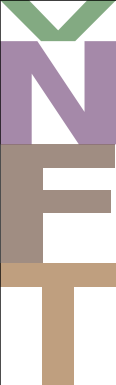
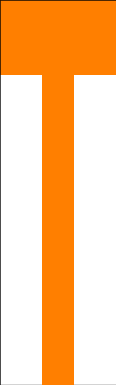
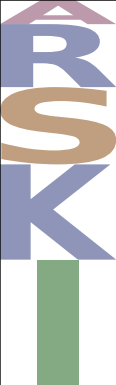
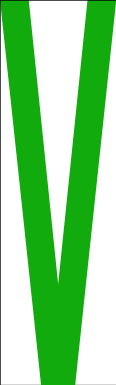
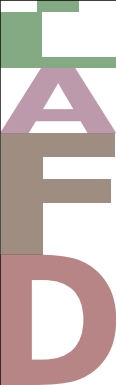
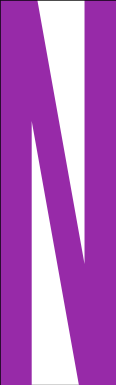
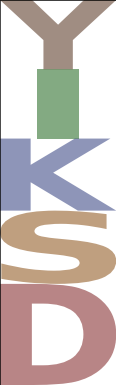
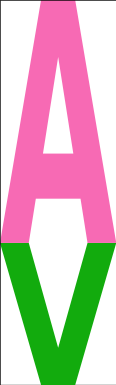
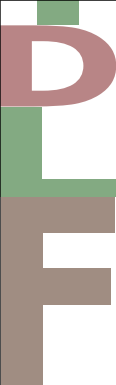
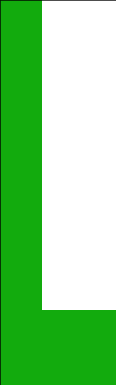
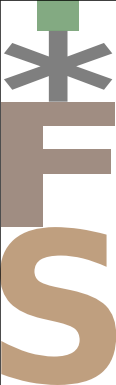
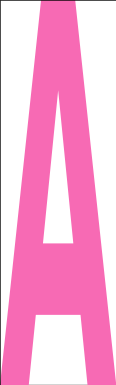
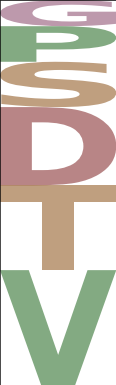
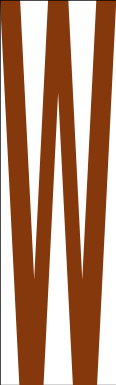
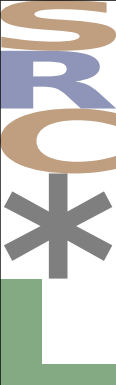
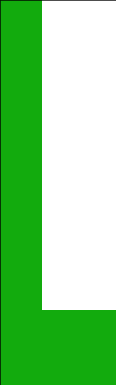
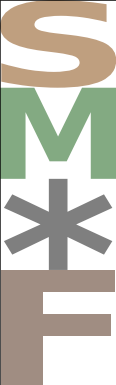
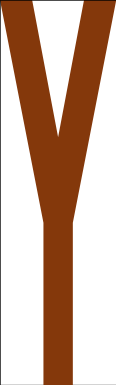
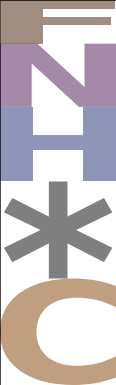
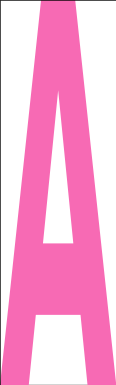
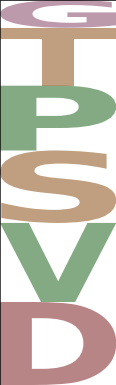
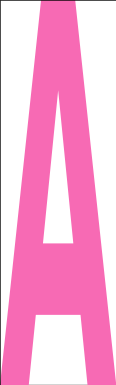
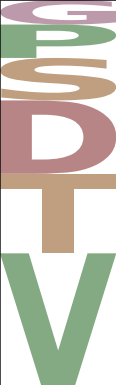
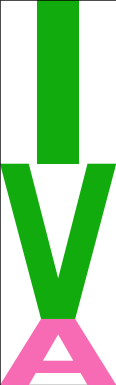
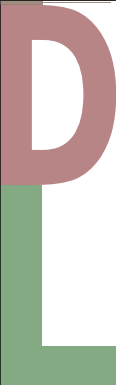
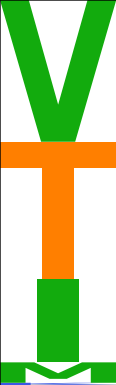
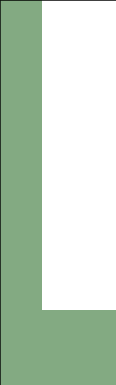
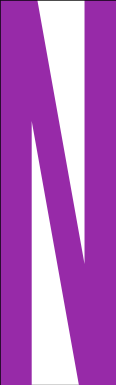
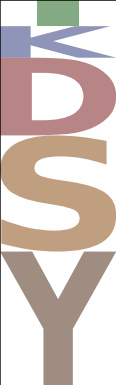
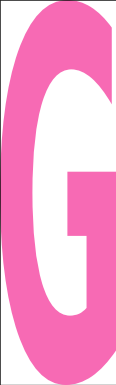
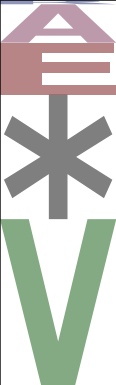
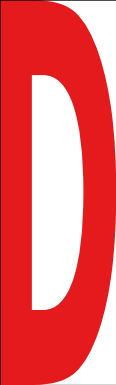
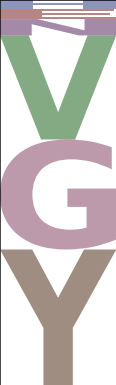
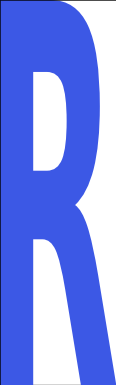
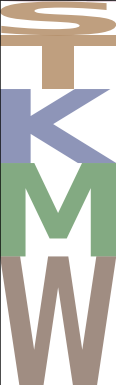
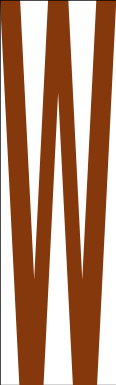
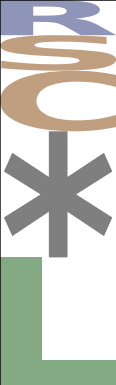
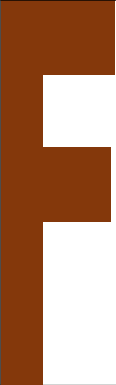
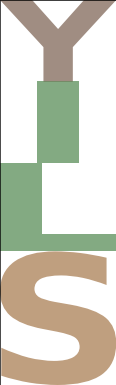
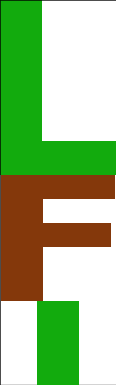
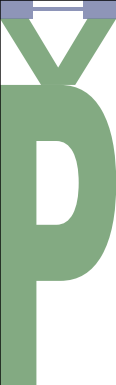
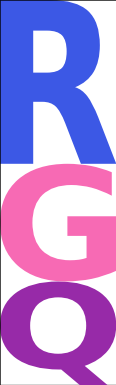
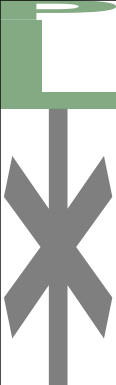
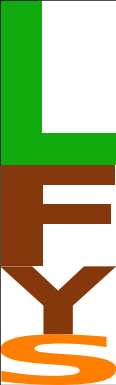
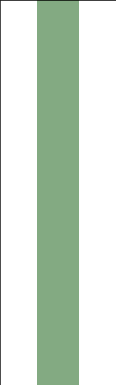
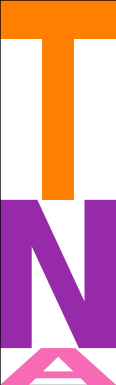
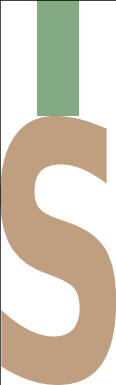
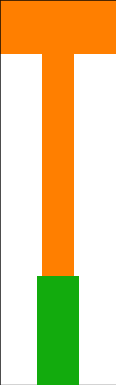
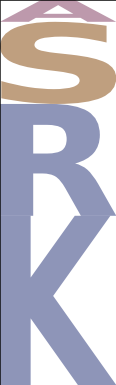
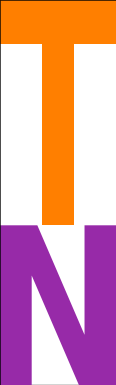
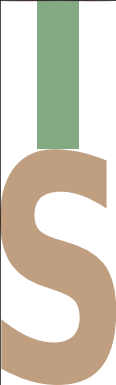
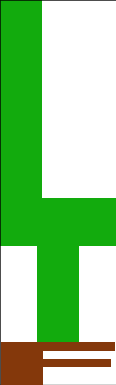
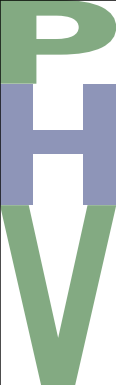
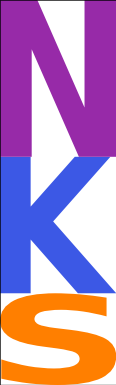
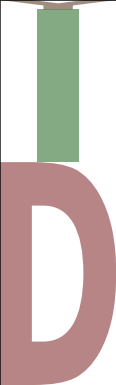
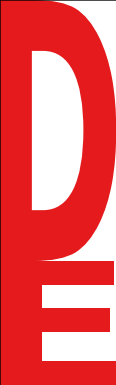
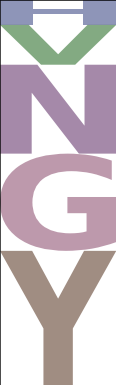
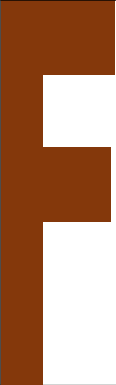
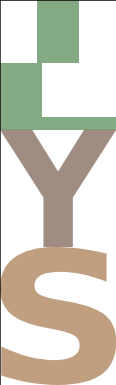
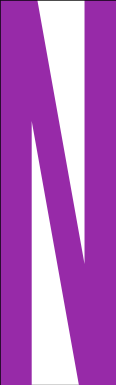
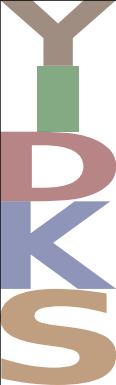
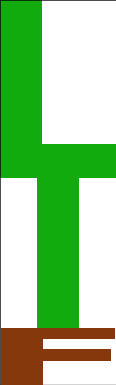
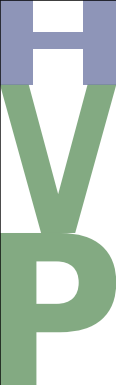
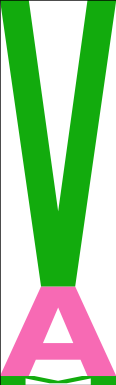
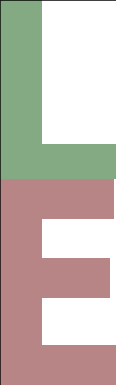
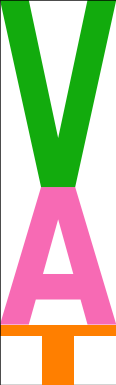
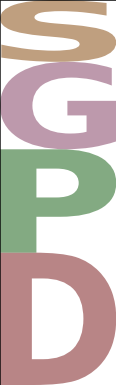
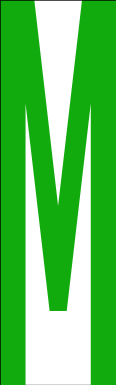
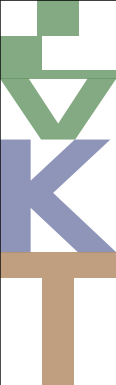
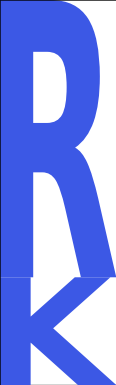
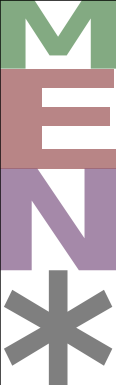
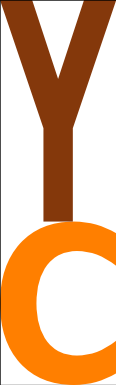
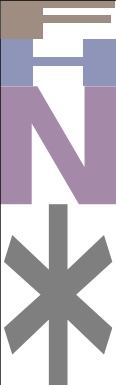
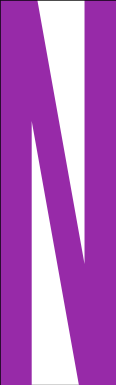
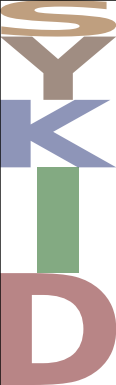
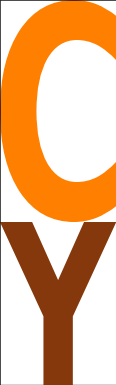
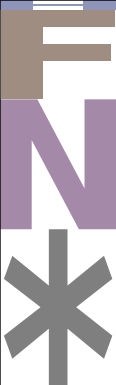
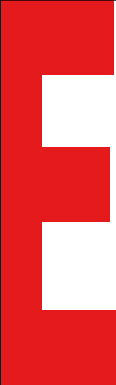
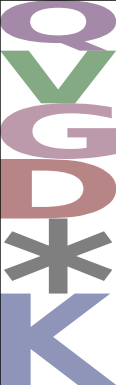
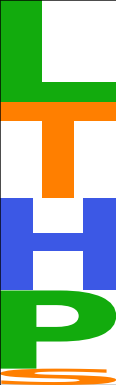
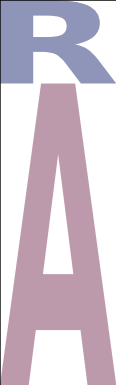
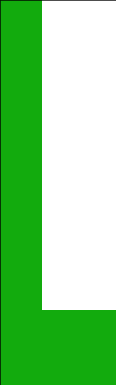
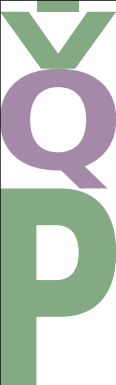
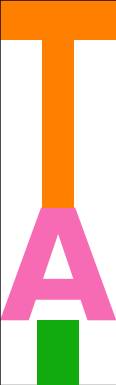
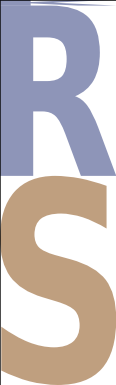
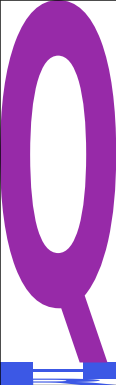
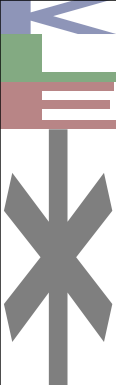
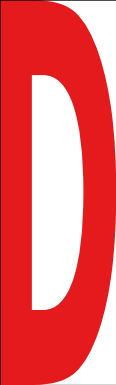
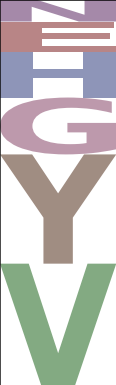
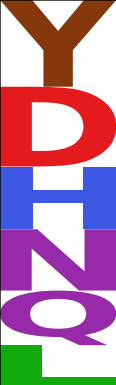
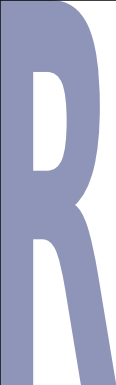
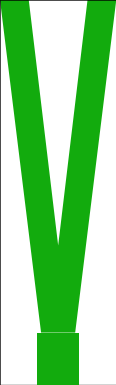
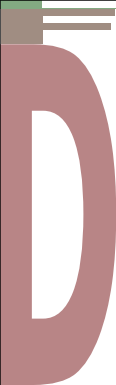
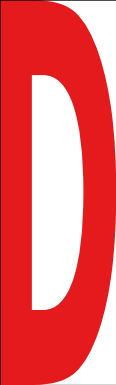
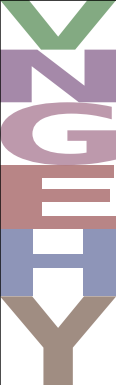
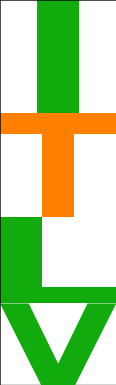
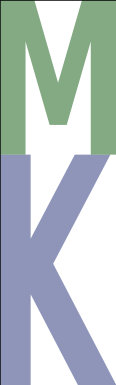
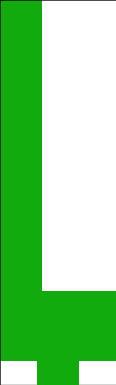
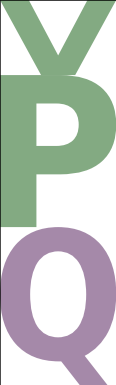
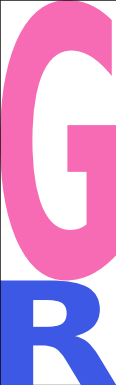
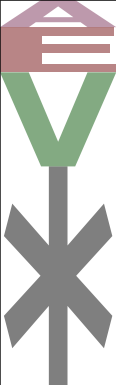
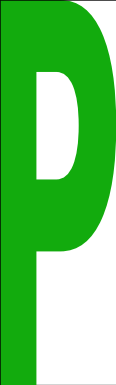
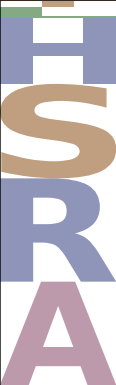
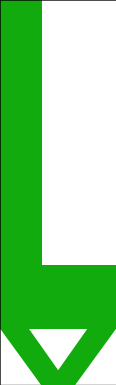
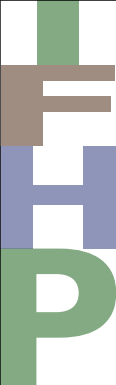
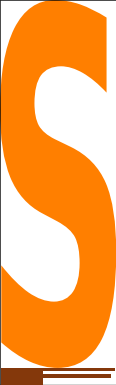
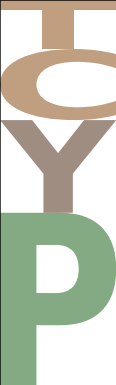
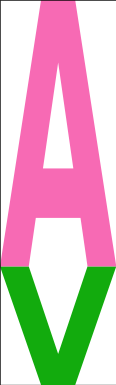
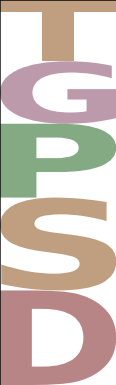
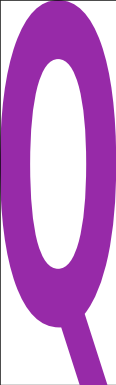
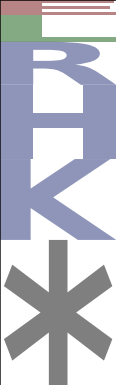
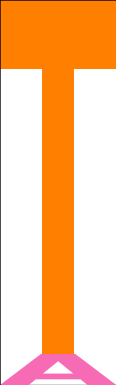
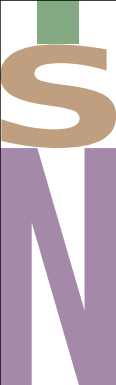
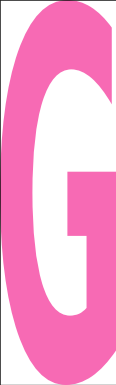
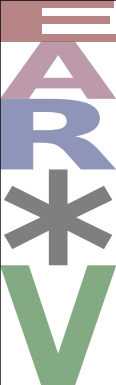
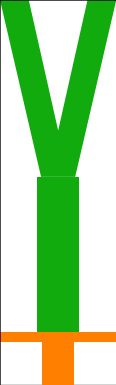
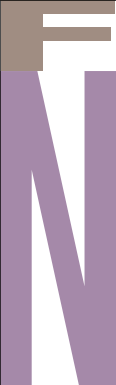
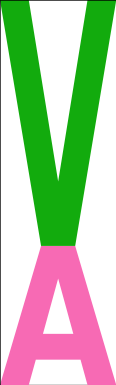
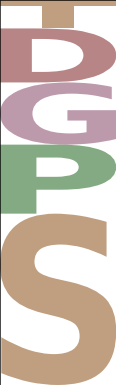
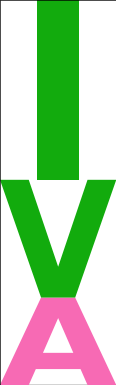
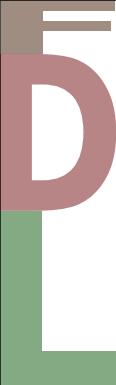
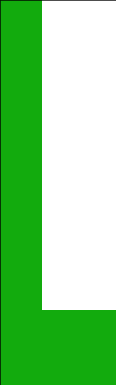
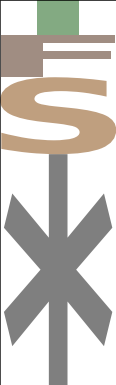
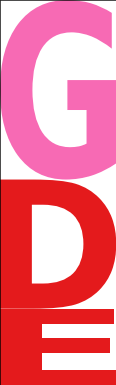
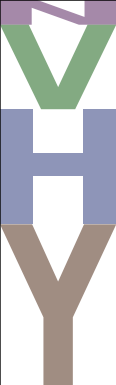
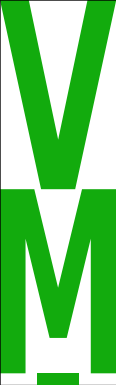
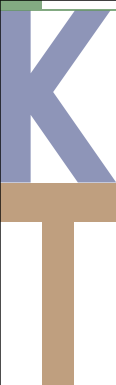
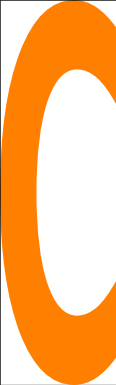
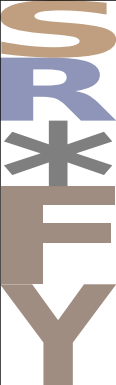
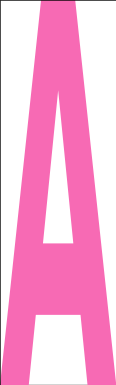
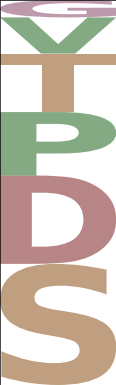
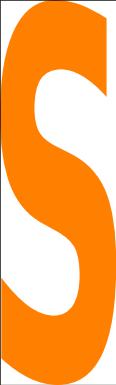
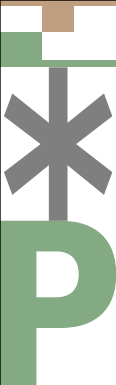
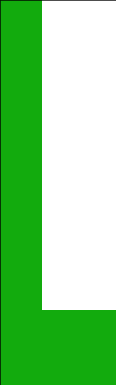
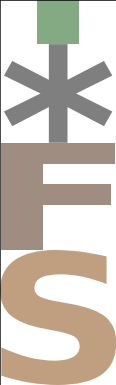
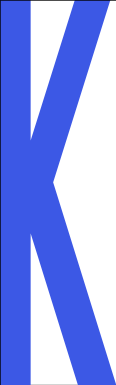
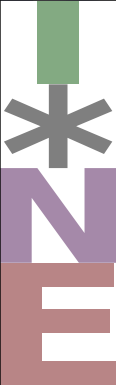
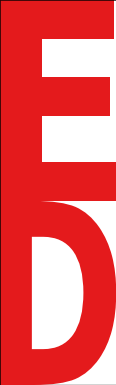
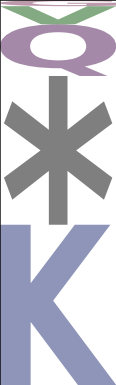
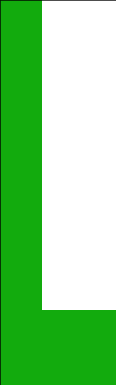
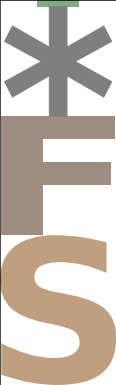
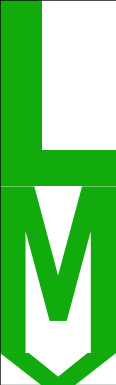
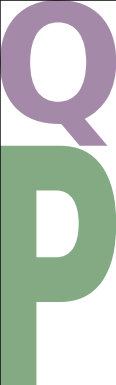
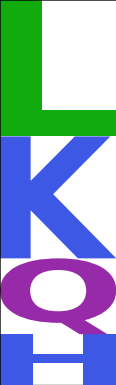
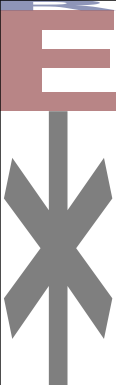
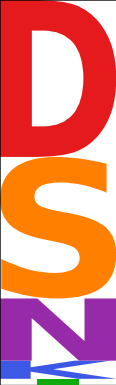
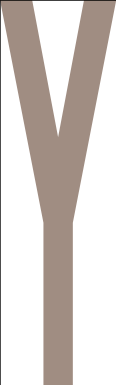
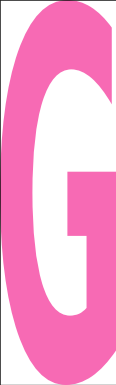
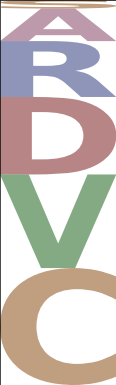
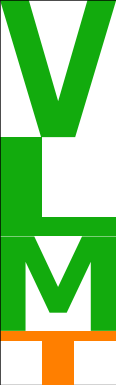
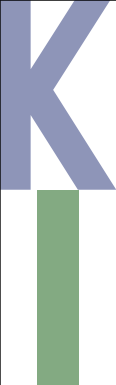
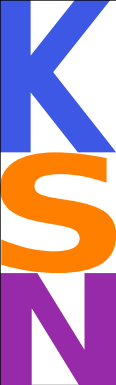
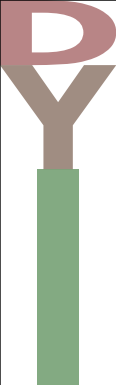
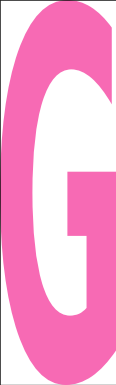
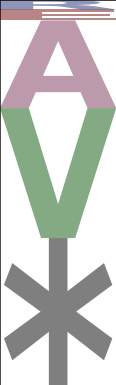
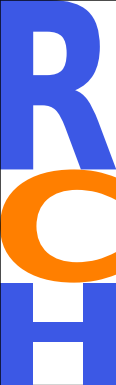
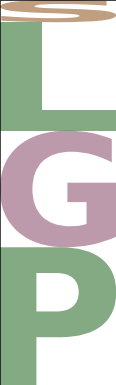
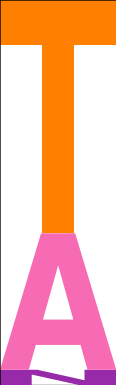
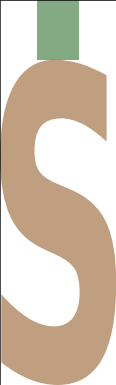
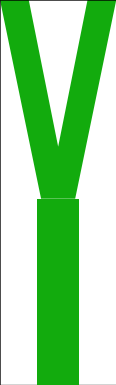
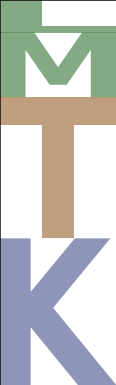
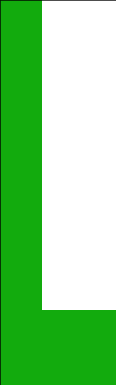
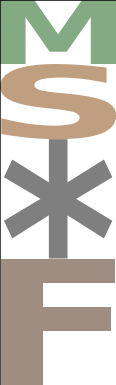
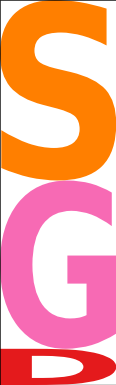
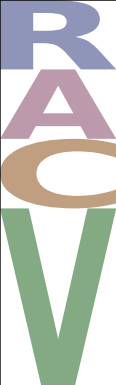
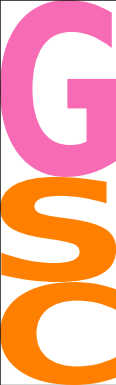
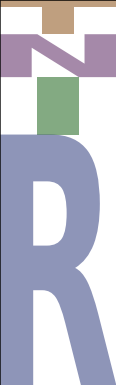
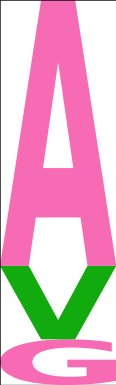
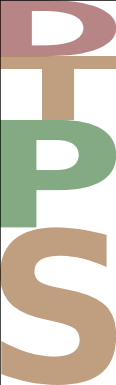
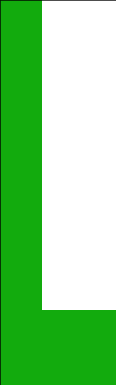
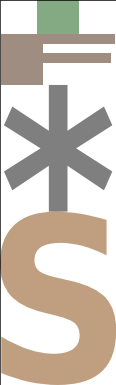
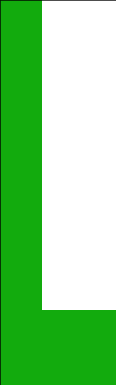
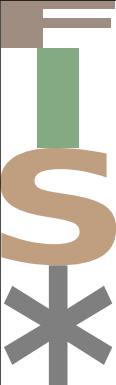
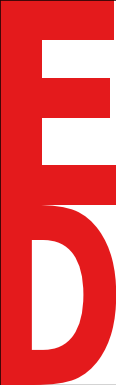
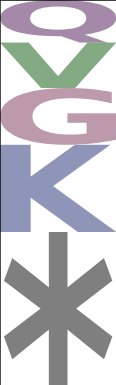
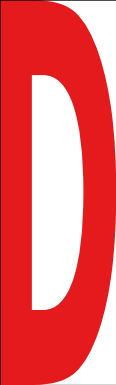
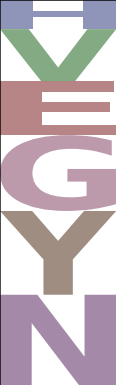
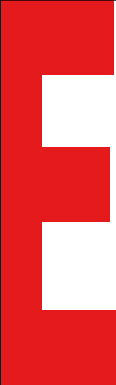
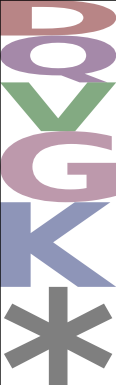
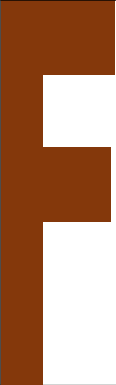
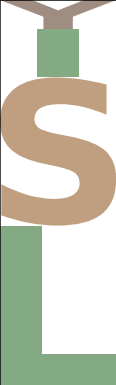
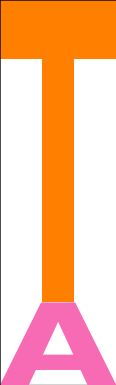
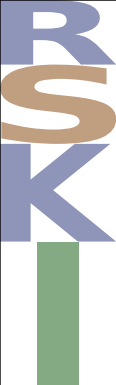
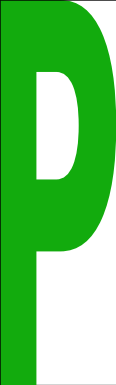
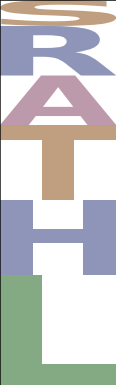
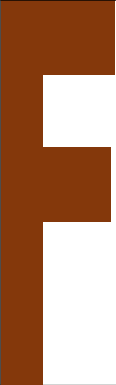
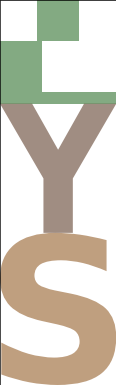
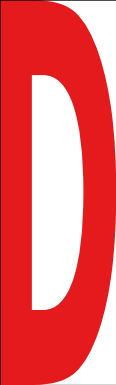
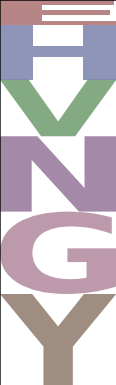
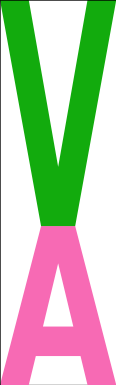
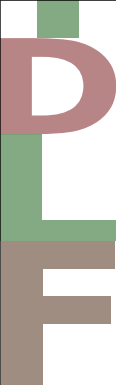
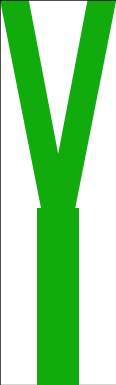
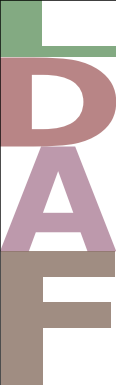
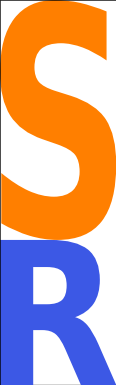
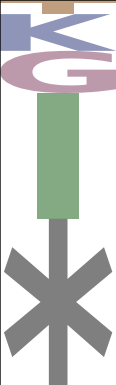
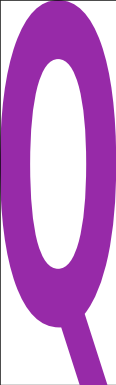
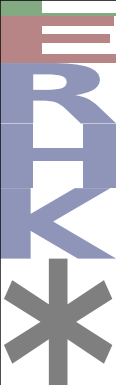
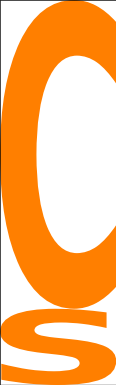
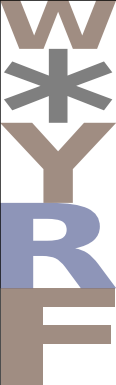
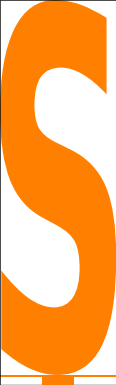
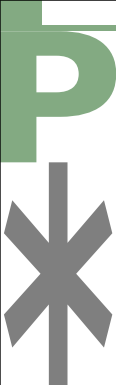
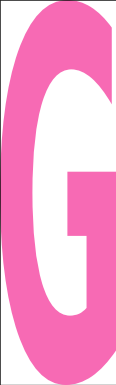
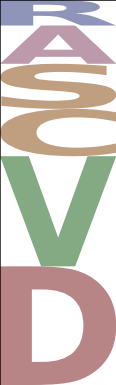
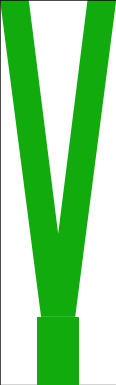
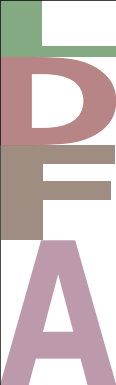
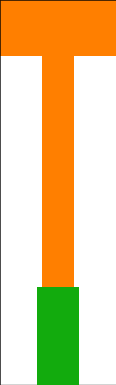
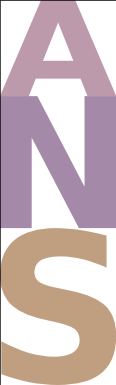
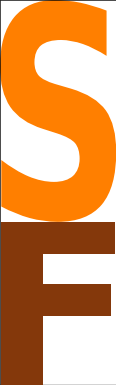
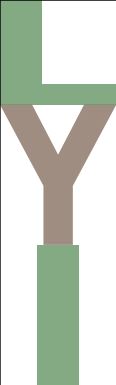
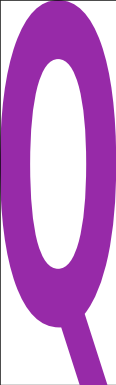
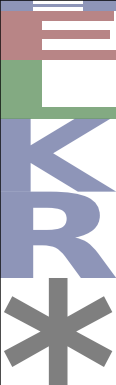

In [8]:
display(HTML(fitness_vizs[0][0]))

In [9]:
ligand = Ligand.from_smiles("CCCCCCC", compound_name="alkane")
sars_cov_2_complex = Complex.from_pdb(protein, ligand_kwargs={"compound_name": "test"}, target_kwargs={"target_name": "test"})
prepped_sars_cov_2_complex = PreppedComplex.from_complex(sars_cov_2_complex)
DockingInputPair(complex=prepped_sars_cov_2_complex, ligand=ligand)





No BioAssembly transforms found, using input molecule as biounit: DesignUnit Components_LIG
Iridium - Structure: DesignUnit Components_LIG has no REMARK data
Processing BU # 1 with title: DesignUnit Components_LIG, chains AB


DockingInputPair(complex=PreppedComplex(target=PreppedTarget(target_name='test', ids=None, data_format=<DataStorageType.b64oedu: 'b64oedu'>, target_hash='2353f6855b9359b5c6693a8e1dccd24b33c634f839f72d192b68e55b0e7d78b5'), ligand=Ligand(compound_name='test', ids=None, provenance=LigandProvenance(isomeric_smiles='CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cc(cc4)Cl)c5cc(ccc5C1=O)Cl', inchi='InChI=1S/C24H20Cl2N4O3/c1-27-21(31)12-29-13-24(19-9-16(26)4-5-17(19)22(29)32)6-7-30(23(24)33)20-11-28-10-14-2-3-15(25)8-18(14)20/h2-5,8-11H,6-7,12-13H2,1H3,(H,27,31)/t24-/m1/s1', inchi_key='JZJCSVMJFIAMQB-XMMPIXPASA-N', fixed_inchi='InChI=1/C24H20Cl2N4O3/c1-27-21(31)12-29-13-24(19-9-16(26)4-5-17(19)22(29)32)6-7-30(23(24)33)20-11-28-10-14-2-3-15(25)8-18(14)20/h2-5,8-11H,6-7,12-13H2,1H3,(H,27,31)/t24-/m1/s1/f/h27H', fixed_inchikey='JZJCSVMJFIAMQB-DLYUOGNHNA-N'), experimental_data=None, expansion_tag=None, tags={}, conf_tags={}, data_format=<DataStorageType.sdf: 'sdf'>)), ligand=Ligand(compound_name='alkane', id

In [10]:
docker = POSITDocker(use_omega=False)
results = docker.dock([docking_input_pair])

NameError: name 'docking_input_pair' is not defined

In [ ]:
fitness_vizs_from_docked =  html_vizualizer_fitness.visualize(inputs=results, use_dask=False)

In [ ]:
display(HTML(fitness_vizs_from_docked[0][0]))